# Описание проекта 

Вы работаете в интернет-магазине **«Стримчик»**, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, `Xbox` или `PlayStation`). Вам нужно `выявить определяющие успешность игры закономерности`. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные `до 2016 года`. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура **ESRB** (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Примечание**

Данные за 2016 год могут быть неполными.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных**

* `Name` — название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

##  Предобработка данных

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

#### Исправления:

* Есть пропущенные значения в колонках: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`;
* Нужно привести к нижнему регистру названия колонок;
* Обработать пропуски и заполнить при необходимости;
* Привести к нужному типу данных (например, в колонке `Year_of_Release` нужно привести к целочисленному типу `int`, а в колонке `User_Score` к вещественному `float`)

Начнем с приведения к **нижнему регистру** столбцов:

In [9]:
data.columns = data.columns.str.lower() # методом str.lower() приводим к нижнему регистру 
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Прежде, чем преобразовывать тип данных, нужно проработать пропуски. 

Начнем с колонки с именем `name`:

In [10]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две строчки ничтожны малы по сравнению со всем датафреймом. Названия игр узнать невозможно, также мы видим совпадение и с пропусками в колонке с жанрами **`genre`**, конечно, ведь без названия игр невозможно определить жанр, поэтому **можно удалять их** без ущерба от потери:

In [11]:
data = data.dropna(subset=['name']).reset_index(drop=True)
data['name'].isna().sum()

0

* Столбец `year_of_release`:

In [12]:
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data['year_of_release'].isna().sum()
mean = data['year_of_release'].isna().mean()
print(f'Доля пропущенных значений в столбце \'year_of_release\': {mean:.2%}')

Доля пропущенных значений в столбце 'year_of_release': 1.61%


In [14]:
data.loc[data['year_of_release'].isna(),'name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

* Видим, что во многих названиях игр **есть год релиза**. Как мы знаем, обычно в названиях пишут год, `не в котором вышла сама игра`. Примером может служить **FIFA22**, которая была выпущена в **2021 году** в `Сентябре - Октябре`.

Пользуясь методом группировки `groupby()` группируем название игры и год релиза, добавляя при этом метод `transform('first)`, который считает и добавляет значения с первой колонки и сохраняем в переменную `true_year`, и заполняем пропуски методом `fillna(value=)`:

In [15]:
true_year = data.groupby('name')['year_of_release'].transform('first')
data['year_of_release'] = data['year_of_release'].fillna(value=true_year)
#data.groupby('name')['year_of_release'].agg('first')
#data.loc[data['year_of_release'].isna(), 'name']

In [16]:
data.loc[16371]
data[183:378]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
184,Tomodachi Life,3DS,2013.0,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,NaN
185,New Super Mario Bros. U,WiiU,2012.0,Platform,2.30,1.34,1.27,0.32,84.0,8.1,E
186,Dragon Quest VIII: Journey of the Cursed King,PS2,2004.0,Role-Playing,0.65,0.75,3.61,0.20,89.0,8.8,T
187,Super Mario Bros. 3,GBA,2003.0,Platform,2.93,1.25,0.83,0.20,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
373,Assassin's Creed: Unity,XOne,2014.0,Action,2.27,0.90,0.00,0.33,72.0,4.1,M
374,Kung Fu,NES,1985.0,Action,1.64,0.38,1.42,0.06,NaN,NaN,NaN
375,Resident Evil 5,X360,2009.0,Action,2.11,0.93,0.12,0.34,83.0,7.5,M
376,Assassin's Creed: Brotherhood,X360,2010.0,Action,2.85,0.38,0.03,0.24,89.0,8.3,M


In [17]:
data.query('year_of_release.isna()')
#data.loc[data['name'] == 'FIFA 14', 'year_of_release'].isna().sum()
data.loc[data['year_of_release'].isna(), 'name'].to_frame()

,name
475,wwe Smackdown vs. Raw 2006
627,Rock Band
657,Frogger's Adventures: Temple of the Frog
804,Rock Band
1141,Rock Band
...,...
16275,Homeworld Remastered Collection
16286,Shorts
16346,Agarest Senki: Re-appearance
16456,Hakuouki: Shinsengumi Kitan


In [18]:
mean1 = data['year_of_release'].isna().mean()
print(f'Доля пропущенных значений после логической замены пропусков в столбце \'year_of_release\': {mean1:.2%}')

Доля пропущенных значений после логической замены пропусков в столбце 'year_of_release': 0.87%


* Видим, что после заполнения осталась малая доля пропущенных значений (**меньше одного процента**). Их можно удалить без ущерба от потери

In [19]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True) # сохраняем порядок
data['year_of_release'].isna().sum()
#data.loc[430:470]

0

In [20]:
data['year_of_release'] = data['year_of_release'].astype('int') # приводим к нужному типу данных

In [21]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
dtype: int64

In [22]:
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [23]:
data[(data['critic_score'].isna())&(data['user_score'].isna())] # проверили на совместимость пропусков

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16562,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16563,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16564,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16565,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [24]:
data['critic_score'].value_counts().to_frame()

,critic_score
70.0,253
71.0,252
75.0,243
78.0,238
80.0,236
...,...
29.0,3
20.0,3
13.0,1
17.0,1


In [25]:
data['user_score'].value_counts().to_frame()

,user_score
tbd,2394
7.8,324
8,288
8.2,279
8.3,253
...,...
1.1,2
1.3,2
0.5,2
0,1


Видим, что в колонке с оценкой пользователей `user_score` есть какая-то неопределенная аббревиатуру `'tbd'`, которая встречается `2394` раз. Пользуясь разными источниками, выявили, что она расшифровывается как **To Be Determined**, то есть **"Будет определено"**. Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе `"Дата выхода"`. Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но **пока** еще **не может назвать** точную **дату**, именно это сокращение и используется.

Исходя из этой информации, можно утерждать, что это просто неопределенная оценка, которая не выставлена. Ее можно заменить на значения, как пропущенное - **NaN**, как и многие в этой колонке. 

* Воспользуемся методом **`pd.to_numeric`**, который переведет значения столбца из `строкового в вещественный тип`, а параметром **errors='coerce'** укажем, что некорректные значения (такие как `'tbd'`) заменяются принудительно на **NaN**:

In [26]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
519,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
643,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
714,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16547,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16549,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16550,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16556,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [27]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [28]:
mean2 = data['user_score'].isna().mean()
mean3 = data['critic_score'].isna().mean()
print(f'Доля пропущенных значений в колонке \'user_score\': {mean2:.2%}')
print(f'Доля пропущенных значений в колонке \'critic_score\': {mean3:.2%}')

Доля пропущенных значений в колонке 'user_score': 54.49%
Доля пропущенных значений в колонке 'critic_score': 51.26%


Доля пропущенных значений в этих столбца очень большая (**свыше 50%**). Возможно, это связано `со сбоем выгрузки данных, либо просто не были выставлены или оценены еще`, что скорее всего. Удалять их будет нерезонно. Слишком большая потеря будет при анализе.

На данный момент мы не можем заполнить пропущенные значения в колонках `user_score` и `critic_score`, т.к. нет данных, подходящих для заполнения. Игры отличаются, а это главный критерий оценки, даже при одном и том же жанре. **Оставим пропуски как есть**


* Теперь колонка `rating:`

In [29]:
display(data['rating'].value_counts().to_frame())
mean4 = data['rating'].isna().mean()
print(f'Доля пропущенных значений в колонке \'rating\': {mean4:.2%}')

,rating
E,3958
T,2930
M,1554
E10+,1412
EC,8
K-A,3
RP,2
AO,1


Доля пропущенных значений в колонке 'rating': 40.44%


По информации на сайте **ESRB** выявили, что:
* `E` - everyone (**для всех**);
* `M` - mature (**от 17 лет+**);
* `T` - teen (**от 13 лет+**);
* `E10+` - everyone 10+ (**от 10 лет+**);
* `K-A` - kids to adults (**устарелое обозначение рейтинга "E" до 1999**);
* `AO` - adults only (**только взрослые** (**от 18 лет+**) );
* `EC` - early childhood (**раннее детство до 3-х лет**);
* `RP` - rating pending (**рейтинг пока не определён**)

In [30]:
data.loc[data['genre'] == 'Shooter', 'rating'].to_frame()

,rating
9,NaN
29,M
31,NaN
32,M
34,M
...,...
16428,NaN
16429,T
16454,NaN
16548,T


Было предположение, что **один и тот же жанр** имеет **одинаковый рейтинг** распределения контента. Но как мы видим из логической индексации, что **это не так**. Поэтому снова нет достаточно информации, чтобы заменить пропуски. 

Появление пропусков также могут быть связаны со сбоем выгрузки данных, либо просто еще не оценено. На данном этапе **оставляем их**

* **Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец с говорящим названием `total_sales`**:

In [31]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)
data['total_sales'].isna().sum()
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16562,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16563,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16564,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16565,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [32]:
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Вывод

* **Разобрали пропущенные значения** в колонках: `name`, `year_of_release`, `genre`, `critic_Score`, `user_score`, `rating`. Заменили некоторые из них (например, в колонке `year_of_release` мы взяли года релиза из названия, а `остальные удалили`). Остальные были `либо удалены, либо оставлены` как есть из-за отсутствия информации к заполнению;
* Привели названия колонок к **нижнему регистру;**
* Столбец `year_of_release` привели к **целочисленному типу**, а в `user_score` **заменили аббревеатуру `'tbd'`** на пропуски и привели к **вещественному типу данных**;
* **Добавили новую колонку `total_sales`** для суммарной продажи по всем регионам

## Исследовательский анализ данных

**Нужно:**
* посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?;
* посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?;
* взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год;
* не учитывать в работе данные за предыдущие годы;
* посмотреть, какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ;
* построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат;
* посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы;
* соотнести выводы с продажами игр на других платформах;
* посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Сколько игр в разные годы

Методом **pivot_table** группируем и создаем таблицу с кол-вом, сохраняя в переменной `games_count_year`

Затем для визуального представления, пользуясь методом **`plot()`** отображаем столбчатый график, переданный параметром `'bar'`

In [33]:
games_count_year = data.pivot_table(index=['year_of_release'], values='name', aggfunc='count')
games_count_year.columns = ['кол-ва игр']
games_count_year

,кол-ва игр
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


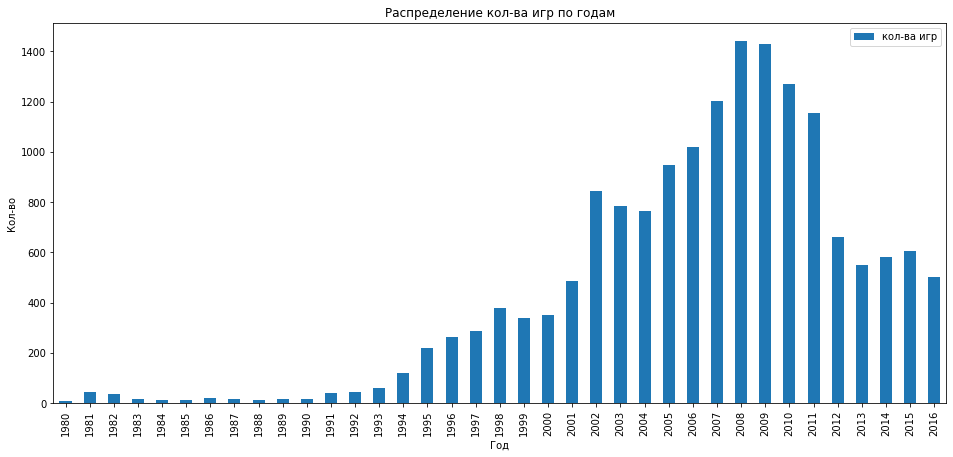

In [34]:
games_count_year.plot(y='кол-ва игр', kind='bar', figsize=(16, 7), legend=True)
plt.title('Распределение кол-ва игр по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во');

#### Вывод

Видим малое кол-во игр, выходившие с `1980 по 1990 года`. После `1994 года` видим характерный **рост** релиза кол-ва игр. Игры становятся популярными, технологический прогресс достигает определенного уровня. Наблюдаем также **небольшой спад** `с 2002 по 2006`, дальше снова рост. Но `после 2010` наблюдается характерный **спад**, и `с 2012 по 2016` **держится** примерно **на одном уровне**. 

Предположим, что это связано со слишком требовательными критериями для игр, что может позволить не каждый компьютер. 

Данные за все периоды не так важны для анализа актуального периода, который сможет помочь в предопределении прогноза на будущий год. Но они могут быть важны для анализа в целом развития игр

### Как менялись продажи по платформам

Также методом **`pivot_table()`** объедиянем и создаем распределение по платформам и суммарным мировым продажам в переменной **`platform_sales_pivot`**. Также нас просят вывести платформы с наибольшими суммарными продажами и построить распределение по годам. Пользуясь методом **`sort_values()`** с параметром `ascending=False` нам удастся вывести эти платформы:

,platform,кол-во мировых продаж
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


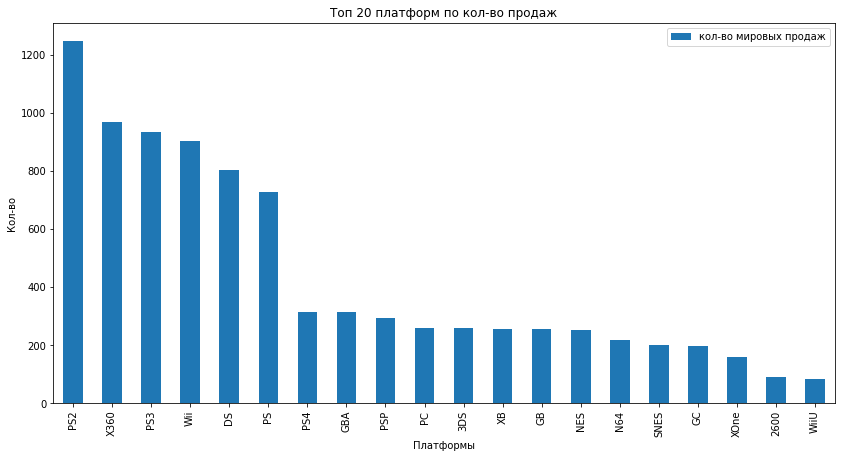

In [35]:
platform_sales_pivot = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_sales_pivot.columns = ['кол-во мировых продаж']
platform_sales_pivot.reset_index(inplace=True) # сохраняем колонку 'platform' в новом датафрейме
display(platform_sales_pivot.head(20)) # по убыванию выводим первые 10стр

platform_sales_pivot.head(20).plot(y='кол-во мировых продаж', x='platform', kind='bar', figsize=(14, 7), legend=True)
plt.title('Топ 20 платформ по кол-во продаж')
plt.xlabel('Платформы')
plt.ylabel('Кол-во');

При анализе подсчета начальных лет релизов и прекращения продаж выявили, что тут наблюдается некоторые ошибки, которые влияют на ответ на вопрос `"За какой срок появляются и исчезают платформы?"`:

In [36]:
data.loc[(data['platform'] == '3DS')&(data['year_of_release'] < 2010)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15203,Mario Tennis,3DS,2000,Sports,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [37]:
display(data.loc[data['platform'] == 'PS2','year_of_release'].min())
display(data.loc[data['platform'] == 'DS','year_of_release'].min())
display(data.loc[data['platform'] == 'PS3','year_of_release'].min())
display(data.loc[data['platform'] == '3DS','year_of_release'].min())

1998

1985

1991

2000

* Релиз **DS** был в `2004` году, когда тут указан `1985` год. Но так как мы видим начало `продаж с 2004` года, то считаем, что это недочет и считаем с этого года;
* Релиз **PS3** тут вовсе в `1991` году (раньше, чем PS2, такого быть не может). Хотя снова по продажам все ок. Видимо это просто недочет, который мы **учтем**.
* С релизом **3DS** также (`True 2010`)

**Исправляем:**

In [38]:
data.loc[data['platform'] == 'DS', 'year_of_release'] = data.loc[(data['platform'] == 'DS')&(data['year_of_release'] > 1985)]
data.loc[data['platform'] == 'PS3','year_of_release'] = data.loc[(data['platform'] == 'PS3')&(data['year_of_release'] > 1991)]
data.loc[data['platform'] == '3DS','year_of_release'] = data.loc[(data['platform'] == '3DS')&(data['year_of_release'] > 2000)]
print(data.isna().sum()) # стало меньше пропусков, так как данных нет за года, которых не существовало для этих платформ
d = data['year_of_release'].isna().mean()
print()
print(f'Доля удаленных неверных строк в колонке \'year_of_release\': {d:.3%}')
print()
data = data.dropna(subset=['year_of_release']).reset_index(drop=True) # появились пропуски - удаляем
data['year_of_release'] = data['year_of_release'].astype('int') # снова преобразовываем в целочисленный тип
print(data.isna().sum())

name                  0
platform              0
year_of_release       3
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         9027
rating             6699
total_sales           0
dtype: int64

Доля удаленных неверных строк в колонке 'year_of_release': 0.018%

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8490
user_score         9025
rating             6697
total_sales           0
dtype: int64


Проделано форматирование некоторых строк датафрейма, которых не может быть. Приведенным аргументированием, считаю, что это вполне логичное решение.

Строим распределение по годам `топ-20` платформ, которые выявили ранее, и смотрим, как шло их развитие. 

`Создаем перемнную` **top_platform_sale**, в которую помещаем топ платформы. Передавая новой переменной **tps** метод **`unique()`**, мы выводим уникальные значения, тем самым создавая массив (список) из этих платформ. Затем:
* задаем цикл, проходящий `по всем значениям` этого списка, 
* `группируем` суммарные продажи по годам для каждой из этих платформ
* и вводим построение `графика линейного` типа

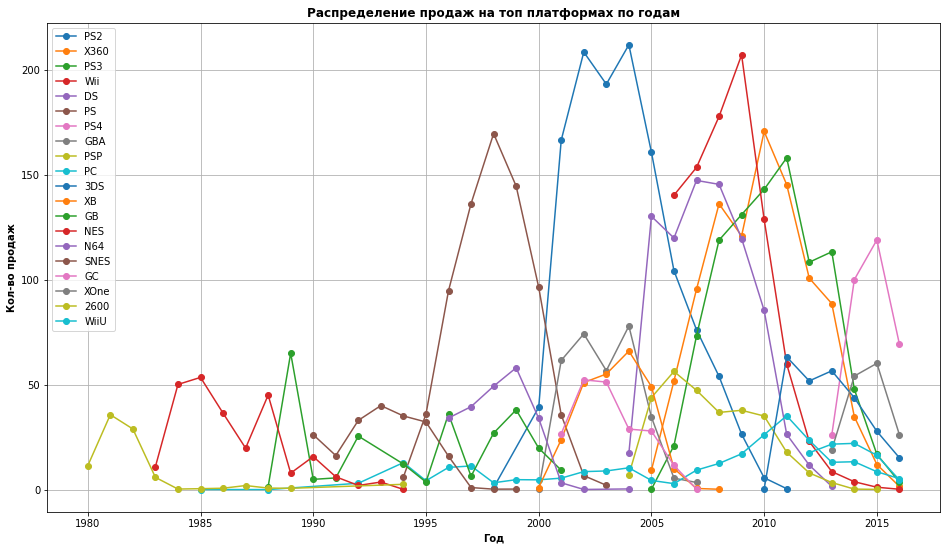

In [39]:
top_platform_sale = platform_sales_pivot['platform'].head(20) # фиксируем топ 20 платформ по продажам 
tps = top_platform_sale.unique() # создам массив из них (список)

for i in range(len(tps)):  # перебираем по значениям список (просто i - индекс, а tps[i] - значение) 
    
    
    plato = data.query('platform == @tps[@i]').groupby('year_of_release')['total_sales'].agg('sum')
    #print(tps[i])
    plato.plot(y='year_of_release', kind='line', style='-o', figsize=(16, 9), legend=True, grid=True,
              label=tps[i]) # legend выводит на экран, а label наш список топ платформ
    
    
    plt.title('Распределение продаж на топ платформах по годам', fontweight='bold') # выделяем крупным шрифтом `bold`
    plt.xlabel('Год', fontweight='bold')
    plt.ylabel('Кол-во продаж', fontweight='bold');

Наглядно представили развитие каждой из `топ-20` платформ. Визуально все получилось, но все же лучше продемонстрировать еще и к каждой платформе **столбчатый график** для детального визуального просмотра:

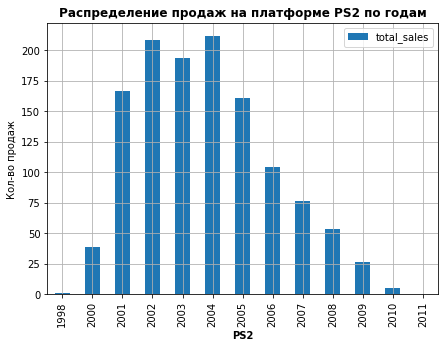

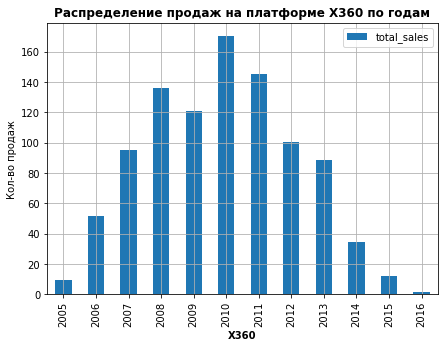

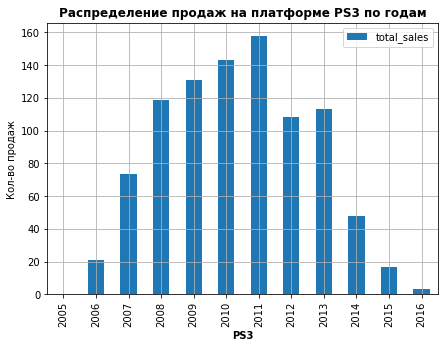

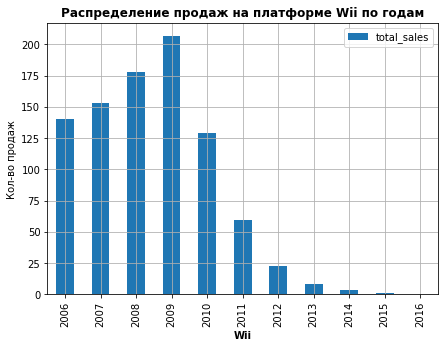

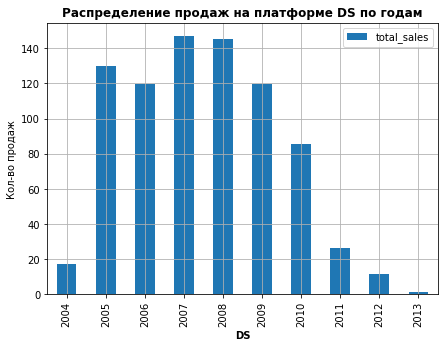

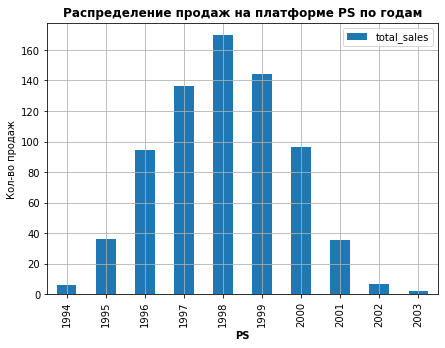

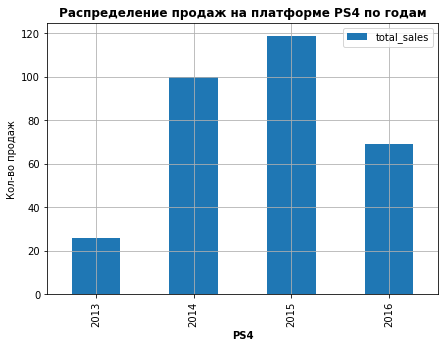

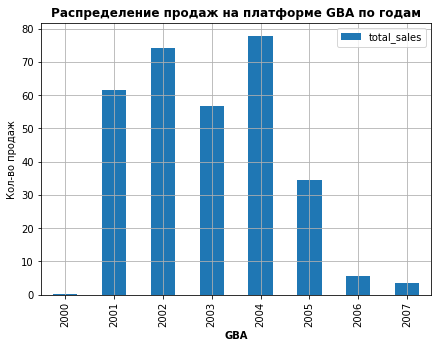

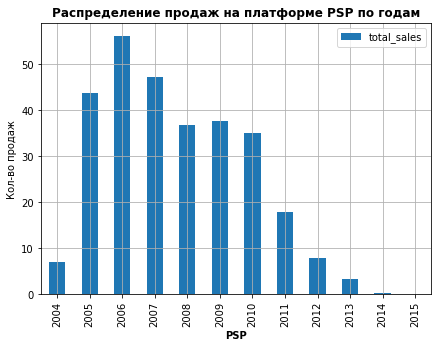

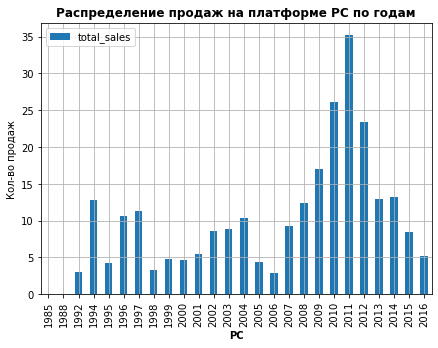

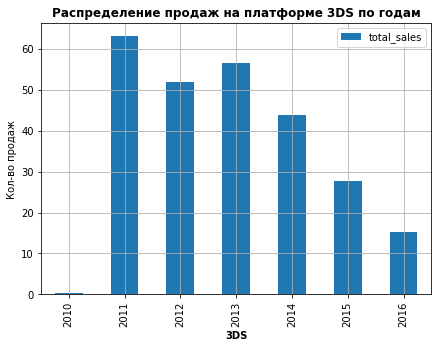

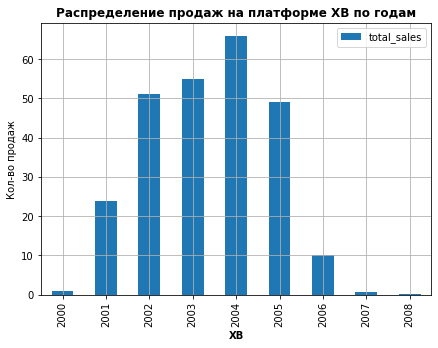

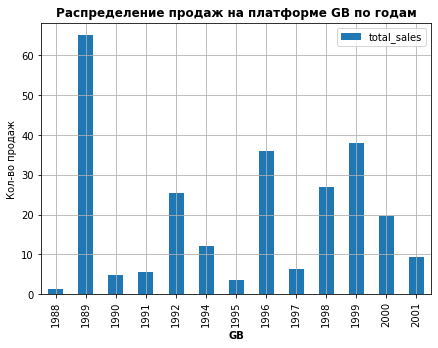

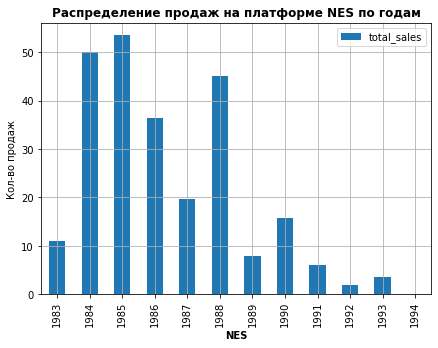

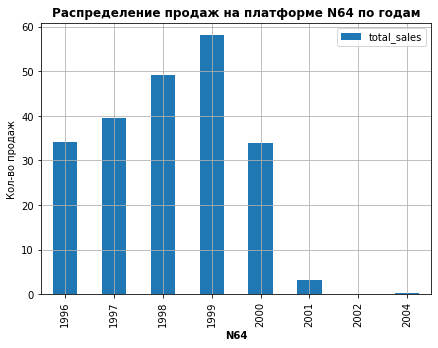

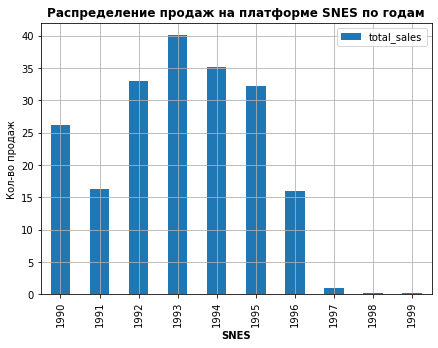

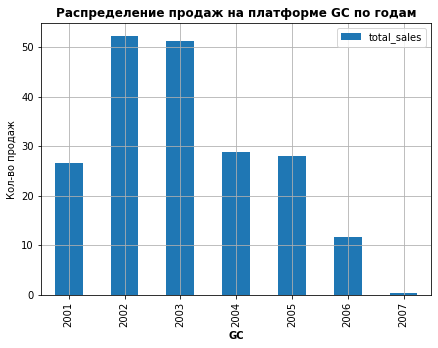

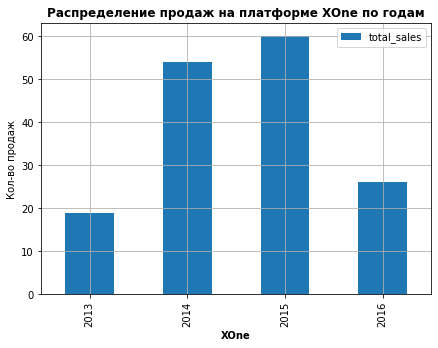

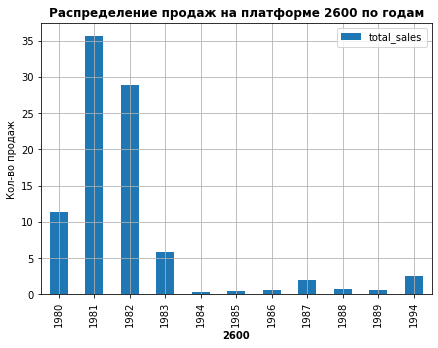

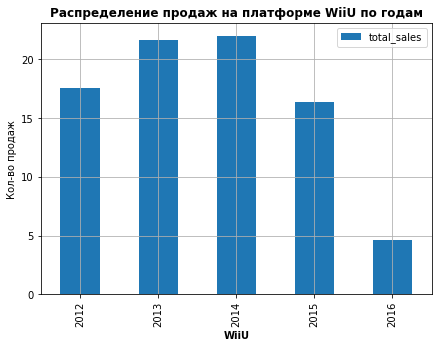

In [40]:
for i in tps: # тут i - значения (платформа)
    
    plato_bar = data.query('platform in @i').pivot_table(index=['year_of_release'], 
                                                         values='total_sales', aggfunc='sum')
    plato_bar.reset_index(inplace=True)
    #print(plato_bar)
    plato_bar.plot(y='total_sales', x='year_of_release', kind='bar', figsize=(7, 5), legend=True, grid=True)
    plt.title('Распределение продаж на платформе' + ' ' + i + ' ' + 'по годам', fontweight='bold')
    #выделяем крупным шрифтом `bold`
    plt.xlabel(i, fontweight='bold') # выводим платформы и выделяем крупным шрифтом `bold`
    plt.ylabel('Кол-во продаж');

Для дальнейшего завершения анализа этого вопроса понадобится список наших топ-20 платформ. Сохраняем его в перемнную `tps_list`
* Создаем таблицу с платформами, годом и суммарной их продажами. 
* Делаем срез с этими топ-20 платформами. 
* Затем группируем нашу таблицу по платформам и выводим подсчет кол-ва лет их востребованности на рынке продаж. И в конце считаем среднее этих топ 20-платформ:

In [41]:
#tps
tps_list = ['PS2', 'X360', 'Wii', 'PS', 'PS4', 'GBA', 'PSP', 'PC', 'PS3', '3DS', 'DS',
            'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU', ] # из списка ранее созданного tps
for_plato = data.pivot_table(index=['platform', 'year_of_release'], values=['total_sales'], 
                             aggfunc=('sum')).reset_index()

for_plato = for_plato.query('platform == @tps_list')
for_plato_mean = for_plato.groupby('platform')['year_of_release'].agg('max') - for_plato.groupby('platform')['year_of_release'].agg('min')
display(for_plato_mean.to_frame())
mean5 = for_plato_mean.mean()
print(f'Средняя продолжительность существования платформ: {round(mean5, 2)} лет')

,year_of_release
platform,
2600,14
3DS,6
DS,9
GB,13
GBA,7
GC,6
N64,8
NES,11
PC,31


Средняя продолжительность существования платформ: 9.85 лет


#### Вывод 

Из графиков видим, что среднее удержание на рынке топ-20 платформ составляет **`до 10 лет`** (учитывая выявленный недочет). Такие платформы как: `PSP`, `X360`, `PS3`, `Wii`, `GBA`, `PS`, `DS` существовали как раз плюс-минус `10` лет (примерно наш выявленный цикл). Немного более просуществовали `PS2`, а характерный вклад в наш подсчет удержания внес `PC`. Есть те, которые появились недавно `PS4, XOne, WiiU, 3DS` (3 года)

### Актуальный период и актуальные платформы

По нашему расчету появления новых и исчезновение старых составляет примерно `10` лет. Возьмем этот срок и рассмотрим платформы, и их актуальность для определения одноименного периода:

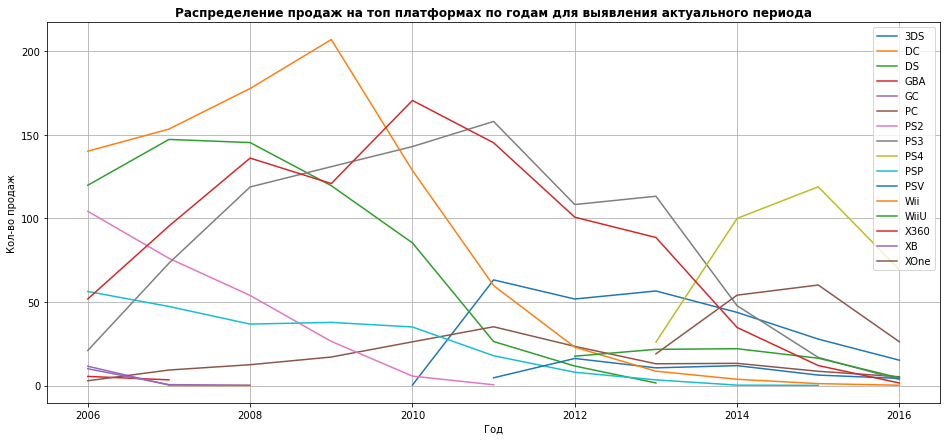

In [42]:
for_actual = data.query('year_of_release > 2005').groupby('platform')['total_sales'].agg('sum').reset_index()
array_for_actual_list = for_actual['platform'].unique()
array_for_actual_list


for i in array_for_actual_list:
    actual_period = data.query('platform == @i and year_of_release > 2005').groupby('year_of_release')['total_sales'].agg('sum')
    #actual_period.reset_index(inplace=True)
    #actual_period = actual_period.query('year_of_release > 2005')
    
    actual_period.plot(y='year_of_release', kind='line', figsize=(16, 7), legend=True, grid=True, 
                       label=i)
    
    plt.title('Распределение продаж на топ платформах по годам для выявления актуального периода', fontweight='bold')
    plt.xlabel('Год')
    plt.ylabel('Кол-во продаж');

####  Выявление актуального периода

Видим, что многие топ платформы по продажам исчезают **к 2013** году: `GBA`,`XB`, `GC` (платформа `DC` не топ по продажам, но она тоже исчезает к 2008 году), либо очень падают, а также появляются новые (`PS4`, `XOne`, `3DS`, `WiiU`). Также подмечаем **упадок** продаж **к 2016** году почти всех платформ, что новых, что старых. По этому анализу выявляем, что **`актуальный период можно считать с 2010 - 2016 года` с появлением таких современных мастодонтов, как `PS4, XOne`**. По нему можно сделать `прогноз на 2017`.

* Разберем **актуальный период `2013- 2016`**

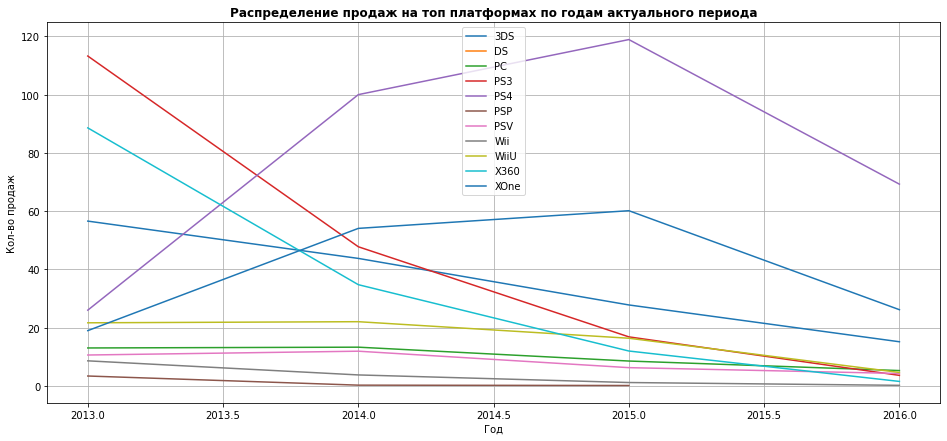

In [43]:
array_actual = data.query('year_of_release >= 2013').groupby('platform')['total_sales'].agg('sum').reset_index()
array_actual_list = array_actual['platform'].unique()
array_actual_list

for i in array_actual_list:
    actual_period = data.query('platform == @i and year_of_release >= 2013').groupby('year_of_release')['total_sales'].agg('sum')
    #actual_period.reset_index(inplace=True)
    #actual_period = actual_period.query('year_of_release > 2005')
    
    actual_period.plot(y='year_of_release', kind='line', figsize=(16, 7), legend=True, grid=True, 
                       label=i)
    
    plt.title('Распределение продаж на топ платформах по годам актуального периода', fontweight='bold')
    plt.xlabel('Год')
    plt.ylabel('Кол-во продаж');

#### Вывод

* Продажи `PS2` **исчезли к 2011**, `PSP` плавно к 2015 прекратили свое существование, а `DS` к **2013** году;
* Платформы `PS3`, `X360`, `Wii` стали **менее востребованы к 2016** году, так как им последовало новое поколение платформ. Пик(`2004год и 1247млн`) платформы `PS2` был самым мощным , почти такой же был у `Wii (2009год и 903млн`), у `X360 (2010 и 966млн`) и `PS3 (2012 и 935млн`). По выявленному среднему циклу в примерно **10** лет, мы можем заключить, что эти платформы прошли свой цикл. **Их не стоит учесть для прогноза на 2017 год.** Хоть они и имели колоссальную востребованность на рынке; 
* `PS4`, `XOne`, `WiiU` - это новые поколения платформ. Наблюдаем сверхпродажи `PS4` в 2015, `XOne` тоже в 2015 (`они и являются самыми продаваемыми к 2016 году`), а вот `WiiU` плюс-минус держится на одном уровне с момента выхода. Но мы видим, что и их продажи **падают** к **2016** году. Но их цикл около 1/3. **Эти платформы стоит учесть на 2017 год.** Их можно выделить на **перспективу**. 
* Также есть `3DS`, `PSV`, которые тоже имеют вес в продажах на 2016 год;
* И есть платформа `PC`. Она демонстрирует стабильность. Немудрено, ведь "компам" нужно тянуть новые игры, которые очень требовательны 

**Выделим топ платформы на 2017 год: `PS4`, `XOne`, `WiiU`, `3DS`, `PC`**


### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам актуального периода

* Делам все так же, как и до этого, вот только задаем метод **boxplot:**

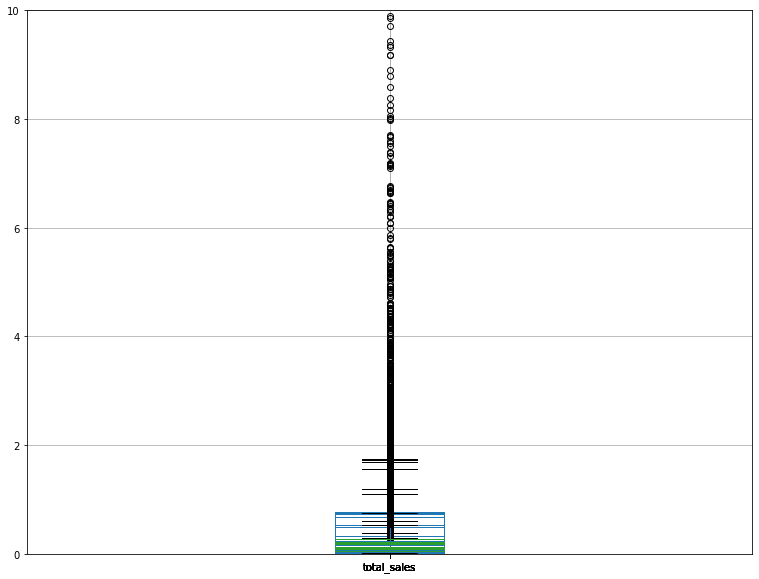

In [44]:
array_actual = data.query('year_of_release >= 2013')
array_actual.reset_index(inplace=True)
array_actual_list = array_actual['platform'].unique()
array_actual_list

for i in array_actual_list:
    actual_boxplot = data.query('platform in @i')
    actual_boxplot.reset_index(inplace=True)
    actual_boxplot.boxplot(column='total_sales', figsize=(13, 10))
    plt.ylim(0, 10);

Более читаемую и наглядную диаграмму приведем для каждой из платформ:

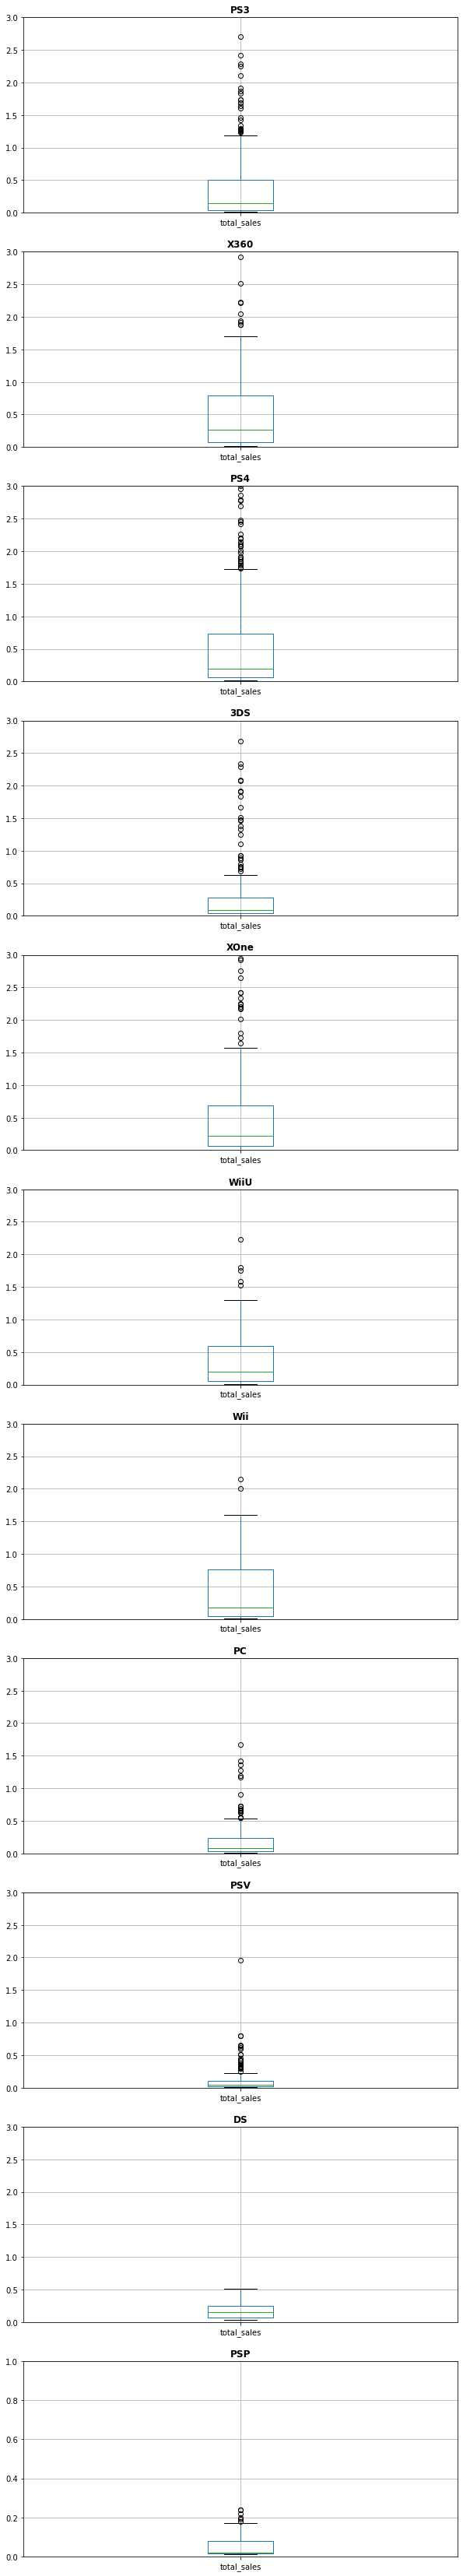

In [45]:
array_actual = data.query('year_of_release >= 2013')
array_actual.reset_index(inplace=True) # сохраняем колонки 
array_actual_list = array_actual['platform'].unique() # создаем массив (список)

fig, axes = plt.subplots(nrows=len(array_actual_list), ncols=1, figsize=(10,60)) # задаем кол-во строк и колонок
                                                                                # и размер к параметру subplots

for i, platform in enumerate(array_actual_list): # цикл по массиву 
    #actual_boxplot = data.loc[(data['platform'] == platform)&(data['year_of_release'] >= 2013), :]
    actual_boxplot = data.query('platform == @platform and year_of_release >= 2013')
    
    actual_boxplot.reset_index(inplace=True)
    actual_boxplot.boxplot(column='total_sales', ax = axes.flatten()[i])
    axes.flatten()[i].set_ylim([0, 3]) # указываем разметку по оси y (если брать больше, то многих значений не будет видно)
    axes.flatten()[i].set_title(platform, fontweight='bold')
    plt.ylim([0, 1])
plt.show();

После диаграмм размаха для более детального изучения цифр вызовем метод **`describe`** для актуальных платформ:

In [46]:
for i in array_actual_list:
    actual_boxplot = data.query('platform in @i and year_of_release >= 2013')
    describe = actual_boxplot.loc[data['platform'] == i, 'total_sales'].describe()
    
    print(i) # платформа, к которой будет применен метод описания
    print()
    print(describe)
    print()

PS3

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

X360

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

PS4

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

3DS

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

XOne

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

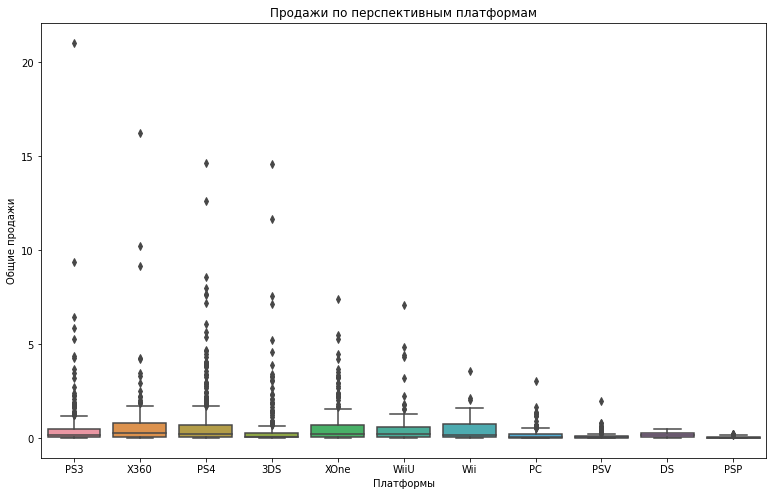

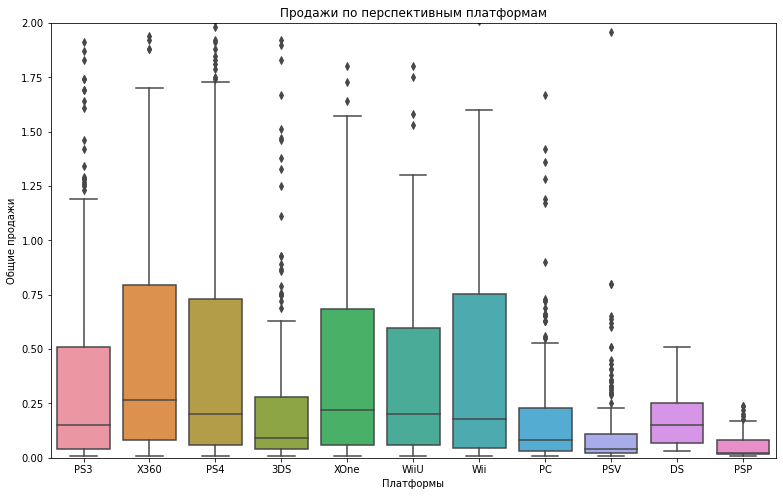

In [47]:
# Также отобразим на одной плоскости

data, y = data.query('year_of_release >= 2013'), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

#### Вывод

Опишу платформы, которые я выделил на `перспективу` в **2017** году, а именно: **`PS4`, `XOne`, `WiiU`, `3DS`, `PC`**

* У платформ **`PS4`,`XOne`** немного разное кол-во продаж. По этим показателям лидирует `PS4`. Но не только по этому критерию лидерство у этой платформы. **Межквартильный размах PS4** составляет от `60 до 730`, то есть от `25% до 75%` игр на `PS4` имеют такую продажу. Видим и **среднюю продажу** по этой платформе, которая **`самая большая среди всех выделенных - 803 тыс копий`**. Что `по диаграмме размаха `- **медианное значение `PS4` равно 0.2**;
* Мы уже затронули немного **`XOne`**. У нее чуть меньше **средние продажи** - **`645 тыс`**. **Межквартильный размах** от `60 до 685`. Крайняя точка 2 квартиля (и в принципе нахождения 99% значений этой платфоры по правилу 3-х сигм) примерно до **3 млн 753 тыс (3,753)**. `Медианное` значения **`XOne`** по диаграмме `примерно одинаковое` - **0.23**;
* У платформы **`3DS`** меньше среднее, чем у обоих - **около 472 тыс**. До 75% значений продаж лежат до **280000 тыс**, меньше чем у `PS4`, но больше, чем у `XOne`. Вот **`медианное значения тоже меньше` - `0.1`**
* Платформа **`WiiU`** имеет **`среднее значение 562 тыс`**. До 75% значений продаж лежат до **595000 тыс**, что больше, чем у `3DS`. `Медианное значение` по "ящику с усами" составляет около **0.22**;
* У **`PC`** `медианное значение меньше всех` - **примерно 0.1**. `Среднее тоже меньше всех` - **208 тыс**. Но эта платформа и держится, как мы ранее отметили, с 1985 года и ее среднее почти не отличается - стабильность). До 75% значений продаж лежат до **230000 тыс**.

Если коротко, то очень большие выбросы(то есть очень большие продажи) у платформ **`PS4`,`XOne`** (5,628 и 3,753 соответственно).Они и увеличивают суммарные продажи. А медианное значение у **`PS4`,`XOne` и `WiiU`** примерно равны - **0.2**. Как и у **`3DS` и `PC`** - **0.1**

(`Считал 99% значений по правилу 3-х сигм (среднее умножить на 3 стд)`)


### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

Посмотрим на платформы по топ продажам, что выявить популярную платформу:

In [48]:
perspective = data.query('year_of_release >= 2013').pivot_table(index=['platform'],
                                                                values='total_sales', 
                                                                aggfunc='sum').sort_values('total_sales',
                                                                                          ascending=False)

perspective.reset_index(inplace=True)
perspective

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,40.06
7,PSV,32.99
8,Wii,13.66
9,PSP,3.74


Из наших ранее определенных платформ, выделенных на перспективу, тут по популярности выделяем **`PS4`**. Ее и будем рассматривать:

In [49]:
analyse_PS4_critics = data.loc[data['platform'] == 'PS4', ['total_sales', 'critic_score', 'user_score']]
display(analyse_PS4_critics)
isna_critic = analyse_PS4_critics['critic_score'].isna().mean()
isna_user = analyse_PS4_critics['user_score'].isna().mean()
print(f'Доля пропусков в \'critic_score\': {isna_critic:.2%}')
print(f'Доля пропусков в \'user_score\': {isna_user:.2%}')

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7
...,...,...,...
16350,0.01,69.0,7.5
16353,0.01,NaN,NaN
16375,0.01,61.0,7.9
16379,0.01,51.0,5.5


Доля пропусков в 'critic_score': 35.71%
Доля пропусков в 'user_score': 34.44%


* Мы ранее уже подмечали, что `есть пропуски` в колонках с оценкой критиков и пользователей. Их никак не заменяли. Их и невозможно заменить, так как нет никаких данных. Мы в данном срезе построим диаграмму рассеяния методом **plot** с параметром вида **kind='scatter'** и посчиаем корреляцию методом **corr**

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Корреляция между продажами и отзывами критиков (critic) для PS4 равна 0.41
Корреляция между продажами и отзывами пользователей (user) для PS4 равна -0.03


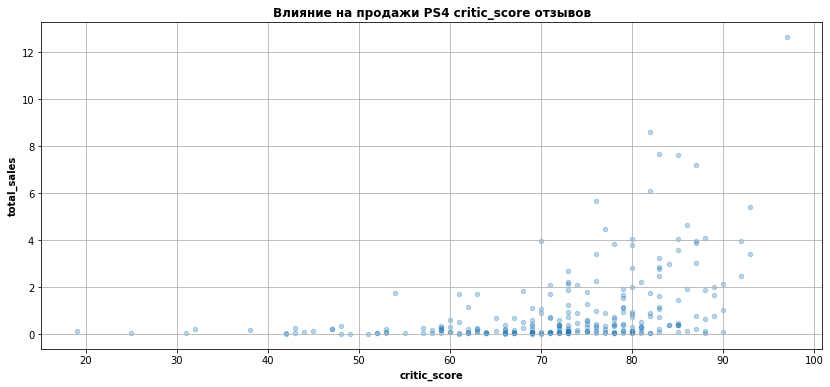

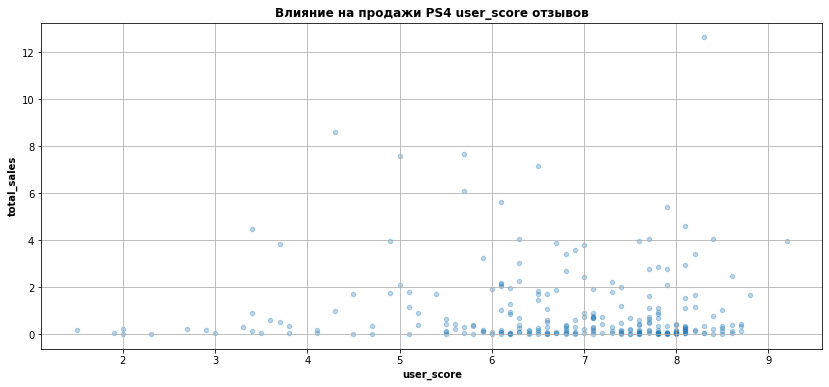

In [50]:
analyse_PS4_critics1 = data.loc[(data['platform'] == 'PS4')&(data['year_of_release'] >= 2013), ['total_sales', 'critic_score', 'user_score']].reset_index(drop=True)

def my_scatter(x):
    analyse_PS4_critics1 = data.loc[(data['platform'] == 'PS4')&(data['year_of_release'] >= 2013), ['total_sales', 'critic_score', 'user_score']]
    analyse_PS4_critics1.plot(kind='scatter', x=x, y='total_sales', alpha=0.3, figsize=(14, 6), grid=True, legend=True)
    plt.title('Влияние на продажи PS4' + ' ' + x + ' ' + 'отзывов', fontweight='bold')
    plt.xlabel(x, fontweight='bold')
    plt.ylabel('total_sales', fontweight='bold');
    
my_scatter('critic_score')
my_scatter('user_score')

display(analyse_PS4_critics1.corr())
corr_Pir = round(analyse_PS4_critics1['total_sales'].corr(analyse_PS4_critics1['critic_score']), 2)
corr_Pir2 = round(analyse_PS4_critics1['total_sales'].corr(analyse_PS4_critics1['user_score']), 2)
print(f'Корреляция между продажами и отзывами критиков (critic) для PS4 равна {corr_Pir}')
print(f'Корреляция между продажами и отзывами пользователей (user) для PS4 равна {corr_Pir2}')

In [51]:
print(len(data.loc[data['platform'] == 'PS4', ['total_sales', 'critic_score']].dropna()))
print(len(data.loc[data['platform'] == 'PS4', ['total_sales', 'user_score']].dropna()))
print(len(data.loc[data['platform'] == 'PS4', ['total_sales', 'critic_score', 'user_score']].dropna()))

252
257
249


#### Вывод
`Отзывы критиков` **(critic_score) для PS4:**

Видим, что для популярной платформы актуального периода **`PS4`** `отзывы критиков (critic_score) имеют вес, то есть чем выше оценка, тем больше продажи.`. **Корреляция Пирсона** равна `0.41`, что довольно близко к `1`, а это значит, что все же **влияет отзывы критиков на продажи PS4**, хоть и не прям сильно

`Отзывы пользователей` **(user_score) для PS4:**

Диаграмма подтверждает нам, что отзывы пользователей почти никак не влияют на продажи платформы **`PS4`**, что выше, что ниже. Подмечаем отрицательную зависимость. **Корреляция Пирсона** равна `-0.03`. Это свидетельствует о почти **никакой зависимости**.

### Соотнесем выводы с продажами игр на других платформах

Напомним, какие платформы находятся в актуальном периоде и какие мы выделили на перспективу в 2017 году:

In [52]:
display(perspective)
perspective_plat = perspective['platform'].unique()
perspective_plat

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,40.06
7,PSV,32.99
8,Wii,13.66
9,PSP,3.74


array(['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii',
       'PSP', 'DS'], dtype=object)

3DS               total_sales  critic_score  user_score
total_sales      1.000000      0.357057    0.241504
critic_score     0.357057      1.000000    0.769536
user_score       0.241504      0.769536    1.000000
XOne               total_sales  critic_score  user_score
total_sales      1.000000      0.416998   -0.068925
critic_score     0.416998      1.000000    0.472462
user_score      -0.068925      0.472462    1.000000
PC               total_sales  critic_score  user_score
total_sales      1.000000      0.199660   -0.089998
critic_score     0.199660      1.000000    0.432737
user_score      -0.089998      0.432737    1.000000
WiiU               total_sales  critic_score  user_score
total_sales      1.000000      0.376415    0.419330
critic_score     0.376415      1.000000    0.721313
user_score       0.419330      0.721313    1.000000
3DS               total_sales  critic_score  user_score
total_sales      1.000000      0.357057    0.241504
critic_score     0.357057      1.000000    

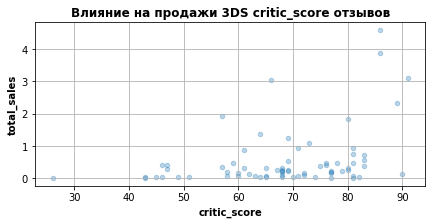

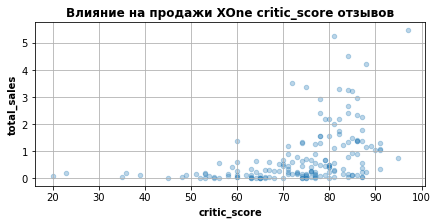

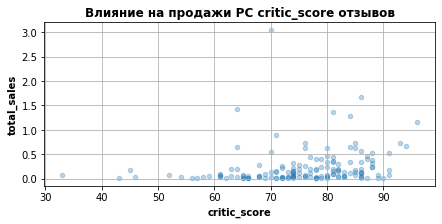

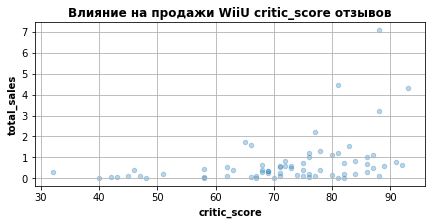

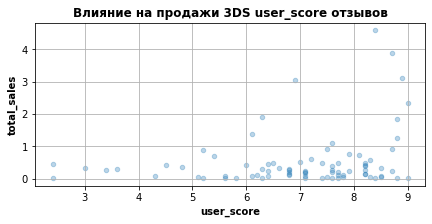

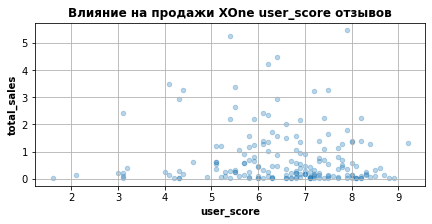

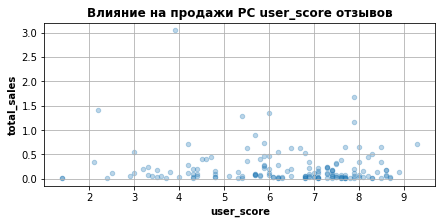

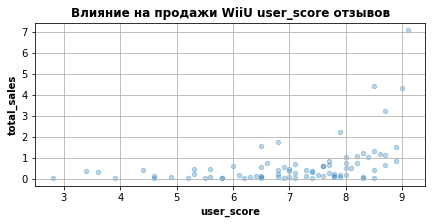

In [53]:
perspective_plat = ['3DS', 'XOne', 'PC', 'WiiU'] # платформы, которые мы выделили на перспективу 2017

def my_scatter(x):
    for i in perspective_plat:
        analyse_scores = data.loc[(data['platform'] == i)&(data['year_of_release'] >= 2013), ['total_sales', 'critic_score', 'user_score']]
        print(f'{i} {analyse_scores.corr()}')
        
        analyse_scores.plot(kind='scatter', x=x, y='total_sales', alpha=0.3, figsize=(7, 3), grid=True, 
                            legend=True)
        plt.title('Влияние на продажи' + ' ' + i + ' ' + x + ' ' + 'отзывов', fontweight='bold')
        plt.xlabel(x, fontweight='bold')
        plt.ylabel('total_sales', fontweight='bold');

my_scatter('critic_score')
my_scatter('user_score')

#### Вывод

* По отзывам от критиков **critic_score** все примерно так же, как и для **PS4**
* Корреляция Пирсона варьируется от **`0.33 - 0.41`**, что свидетельствует, что зависимость продаж от оценки критиков есть, но она не сильная; 
* Что касается оценки пользователей **user_score**, то тут неоднозначно. Например, для платформы **`3DS`** она равна `0.24`, что говорим об небольшой зависимости, что все-таки люди смотрят перед покупкой оценку пользователей, а вот для **`XOne`** она отрицательная и крайне мала - `-0.068`, что говорит об обратном - **почти нет влияния**. 
* Для **`PC`** примерно такая же корреляция продаж от оценки пользователей; 
* Вот платформа **`WiiU`** имеет самую большу зависимость среди наших топ платформ. Она составляет `0.40`. На этой платформе люди чаще смотрят оценки пользователей перед покупкой

### Посмотрим на общее распределение игр по жанрам

,genre,name
0,Action,769
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,156
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


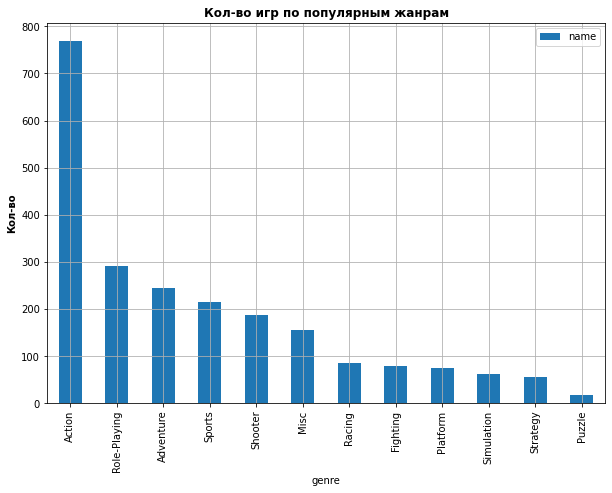

In [54]:
games_genre_new_count = data.query('year_of_release >= 2013').groupby('genre')['name'].count()
games_genre_new_count = games_genre_new_count.sort_values(ascending=False).reset_index()
display(games_genre_new_count)
games_genre_new_count.plot(y='name', x='genre', kind='bar', figsize=(10, 7), legend=True, grid=True) 
plt.title('Кол-во игр по популярным жанрам', fontweight='bold')
plt.ylabel('Кол-во', fontweight='bold');

,genre,total_sales
0,Action,322.50
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,63.06
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


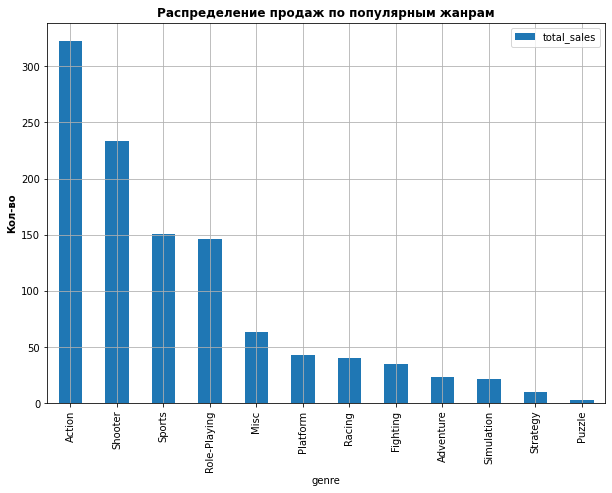

In [55]:
most_income = data.query('year_of_release >= 2013').groupby('genre')['total_sales'].sum()
most_income = most_income.sort_values(ascending=False).reset_index()
display(most_income)
most_income.plot(y='total_sales', x='genre', kind='bar', figsize=(10, 7), legend=True, grid=True) 
plt.title('Распределение продаж по популярным жанрам', fontweight='bold')
plt.ylabel('Кол-во', fontweight='bold');

,genre,total_sales
0,Action,322.50
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,63.06
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


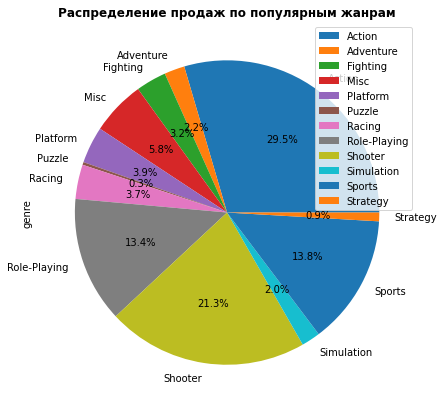

In [56]:
most_income = data.query('year_of_release >= 2013').groupby('genre')['total_sales'].sum()
display(most_income.sort_values(ascending=False).reset_index())
most_income.plot(y='total_sales', x='genre', kind='pie', figsize=(10, 7), legend=True, grid=True, 
                 autopct='%1.1f%%', label='genre') #autopct='%1.1f%%'- форматирование цифр в параметре pie метода plot
plt.title('Распределение продаж по популярным жанрам', fontweight='bold');

,genre,median
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Misc,0.105
8,Simulation,0.100
9,Strategy,0.080


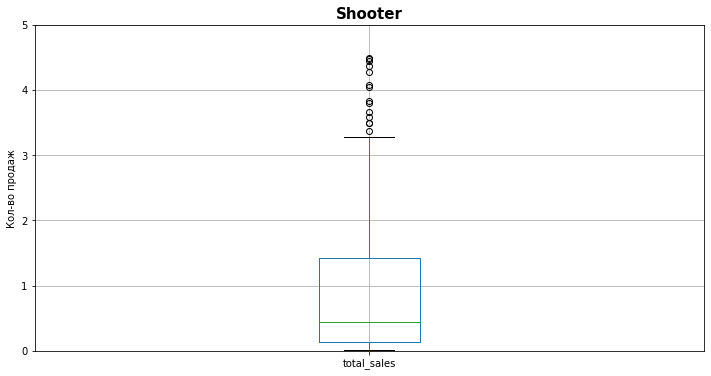

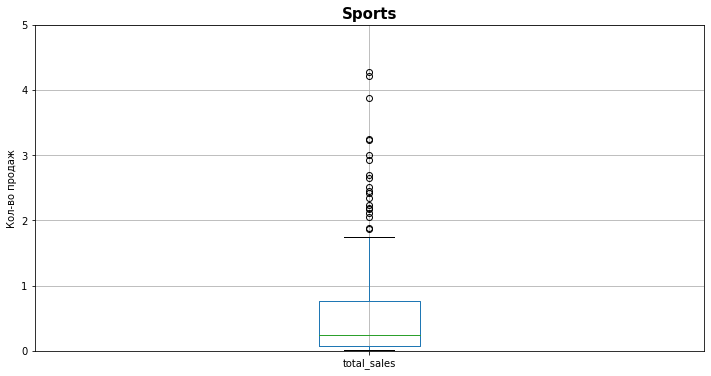

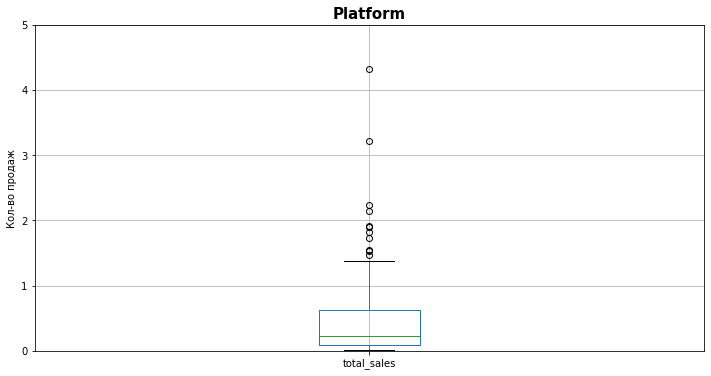

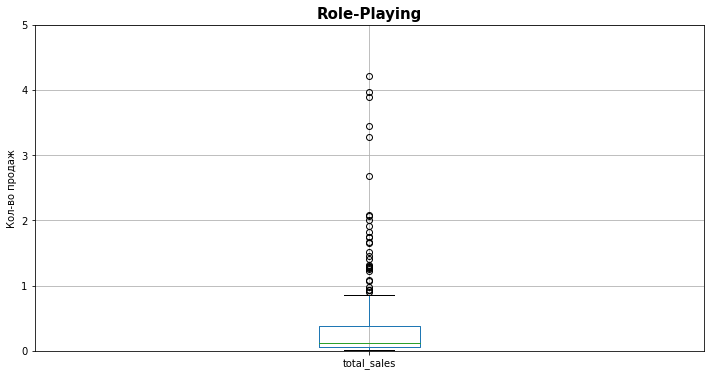

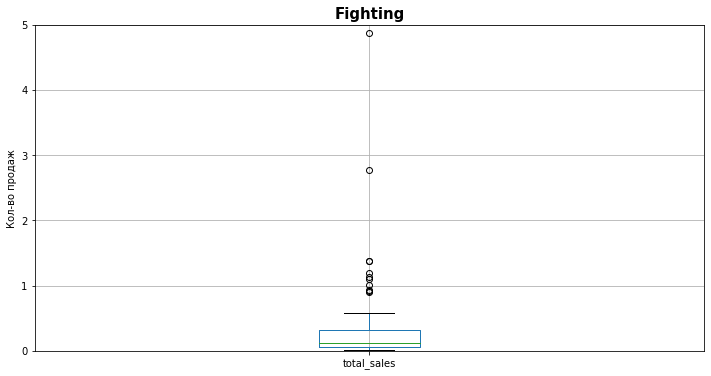

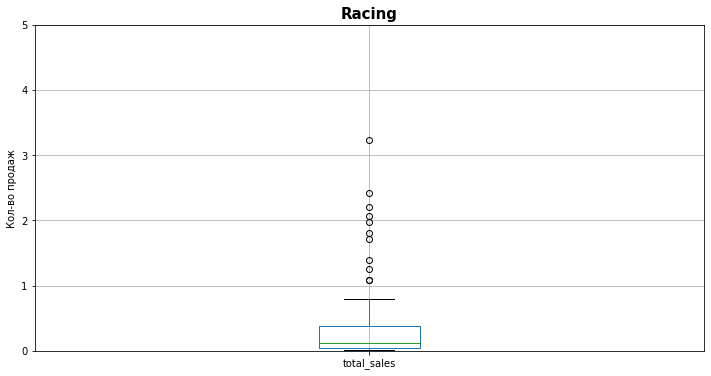

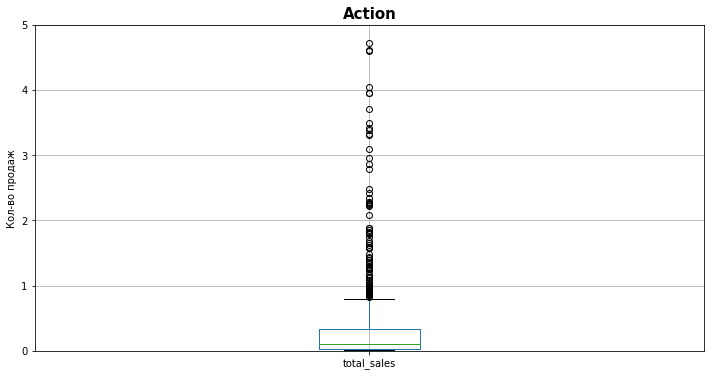

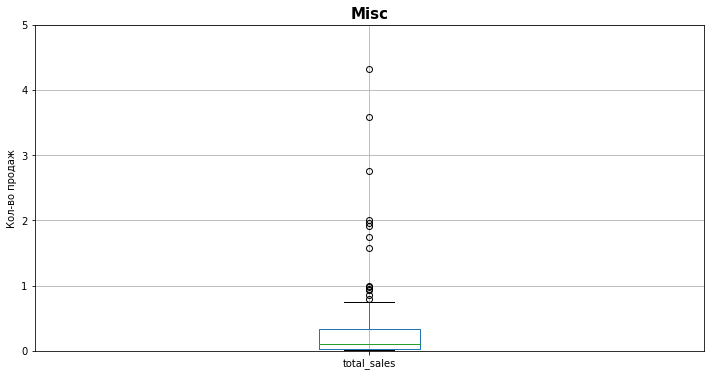

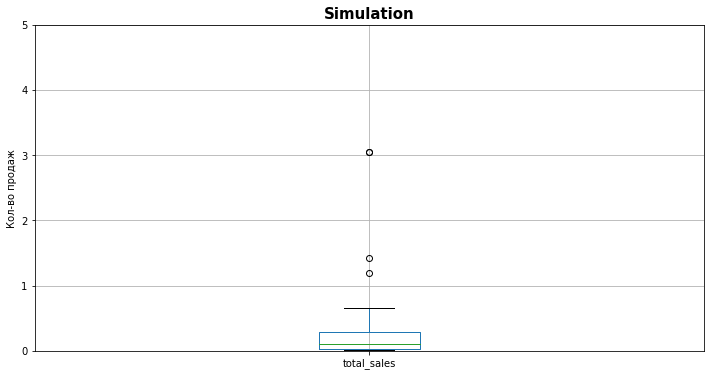

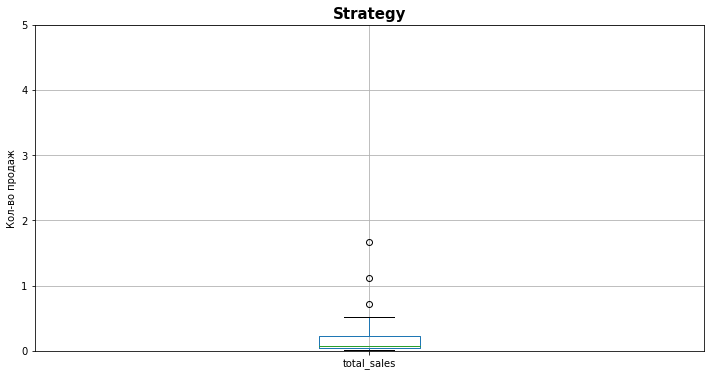

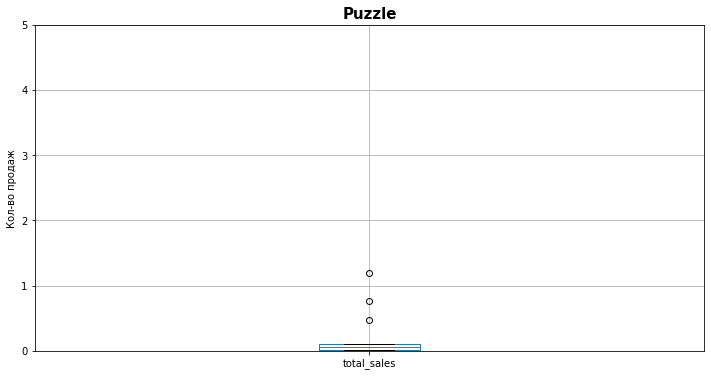

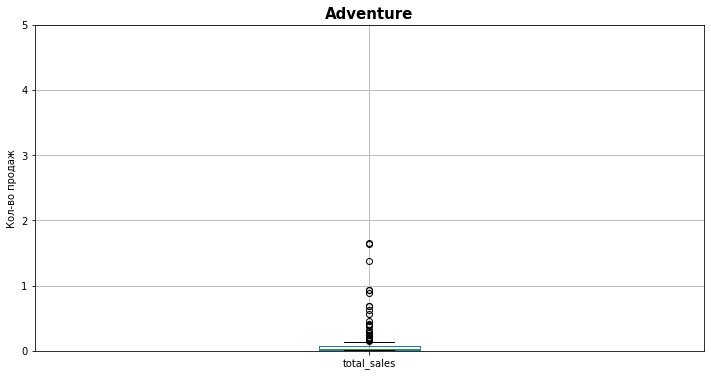

In [57]:
#most_income_list = most_income['genre'].unique()
genre_median = data.groupby('genre')['total_sales'].agg('median').sort_values(ascending=False).reset_index()
genre_median.columns = ['genre', 'median']
display(genre_median)


for i in genre_median['genre'].unique():
    boxplot_genre = data.query('genre in @i and year_of_release >= 2013')
    boxplot_end = boxplot_genre.boxplot("total_sales", figsize=(12, 6))
    plt.title(i, fontsize=15, fontweight='bold')
    plt.ylabel('Кол-во продаж')
    plt.ylim(0, 5)
    plt.show();

In [58]:
for i in genre_median['genre'].unique():
    genre_boxplot = data.query('genre in @i and year_of_release >= 2013')
    describe = genre_boxplot.loc[data['genre'] == i, 'total_sales'].describe()
    
    print(i)
    print()
    print(describe)
    print()

Shooter

count    187.000000
mean       1.245882
std        2.014107
min        0.010000
25%        0.140000
50%        0.450000
75%        1.425000
max       14.630000
Name: total_sales, dtype: float64

Sports

count    214.000000
mean       0.703972
std        1.219237
min        0.010000
25%        0.070000
50%        0.240000
75%        0.765000
max        8.580000
Name: total_sales, dtype: float64

Platform

count    74.000000
mean      0.576081
std       0.806808
min       0.010000
25%       0.090000
50%       0.225000
75%       0.627500
max       4.320000
Name: total_sales, dtype: float64

Role-Playing

count    292.000000
mean       0.499623
std        1.353164
min        0.010000
25%        0.060000
50%        0.125000
75%        0.382500
max       14.600000
Name: total_sales, dtype: float64

Fighting

count    80.000000
mean      0.441375
std       1.048883
min       0.010000
25%       0.060000
50%       0.125000
75%       0.322500
max       7.550000
Name: total_sales, dtype:

#### Вывод

* Самыми прибыльными жанрами оказались: **`Platform (0.27 млн продаж)`, `Shooter (0.24)`, `Sports (0.22)`, `Fighting (0.21)` и только теперь `Action с 0.19 млн копий` (хотя по топ кол-во игр этот жанр превосходит - 769 в актуальный период)**. На эти жанры нужно обращать внимание при продвижении продаж платформ на будущее. 

Игр **`Action`** хоть и выпускают много, но вот он по `медианном значении` только на `топ 5`. Может это связано с тем, что экшн **`Action`** менее затягивает, так как эта игра `одноразовая`, а шутер **`Shooter`** более `разнообразный` и можно играть компетатив (`соревновательный`) режим. Правда и делать такие игры гораздо сложнее и дольше;
* Что касается `топ один` по медиане продаж **Platform** это то, что это легкие игры, быстрые, на один раз, но будут всегда востребованы;
* В жанре **Sports** лидирует компетатив сцена, ты можешь играть `со своим другом`, `коллегой`, `членом семьи`, `с кем угодно`, что создает общий досуг и `мини соревнование` между вами. `Поэтому такие игры будут популярны`
* Что касается **менее востребованных жанров** (**`Adventure (0.05 млн продаж)`, `Strategy(0.1)`, `Puzzle(0.11)`**) это то, что им не хватает как раз "экшна", "драйва". Вот жанр `Puzzle` откровенно очень скучен. Их и выпускают `мало` - **117**;
* Хоть игры жанра "приключение" **`Adventure`** и делают много **(245)**, все равно они одноразовые. Все-таки большинсву людей эти критерии очень важны и привлекательны. Они на любителя. Но игры этих жанров все равно находят свою аудиторию, ведь людей очень много, и все они разные

**`Но как было уже подмечено коллегой, тут почти в каждом жанре есть много выбросов, это говорит о том, что в них во всех есть супер популярные игры с продажами, которые выше средних`**

## Составление портрета пользователя каждого региона (NA, EU, JP)

Создаем общую функцию для каждого региона акутального периода `2013 - 2016` с аргументами, принимающие значения продаж региона `reg_sales` и популярных (платформ, жанров и рейтинга) `index`: 

* в переменную `plat` методом **`pivot_table`** создаем таблицу по платформам, жанрам, рейтингам и суммарным продажам, 
* методом **`sort_values()`** выводим в обратном порядке `ascending=False` (убыванию - от большего к меньшому),
* сохраняем колонки `reset_index` и выводим 5 строк
* методом **`', '.join()`** выводим строки из списка с разделителем запятой
* и передаем функции нужный регион 

Но прежде всего ставим `"заглушку"` на `пропущенные значения` рейтинга **ESRB**:

In [59]:
data['rating'] = data['rating'].fillna(value='Unknown') # неизвестно будет заглушкой
data['rating'].value_counts().to_frame()

,rating
Unknown,978
M,372
T,333
E,302
E10+,252


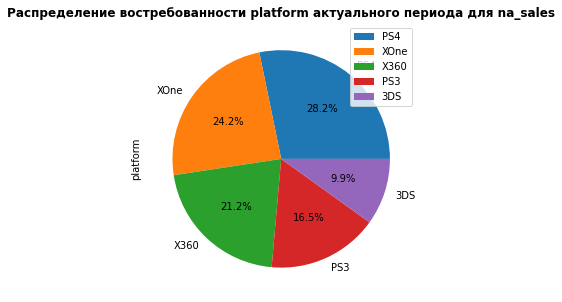

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


Популярные значения по platform региона na_sales актуального периода: PS4, XOne, X360, PS3, 3DS



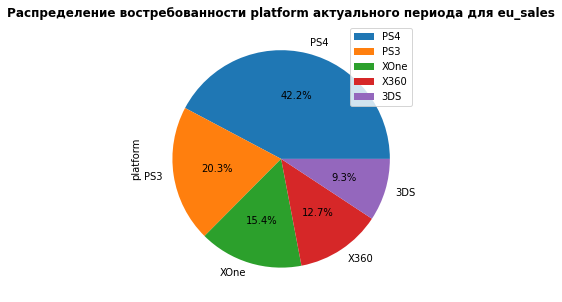

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


Популярные значения по platform региона eu_sales актуального периода: PS4, PS3, XOne, X360, 3DS



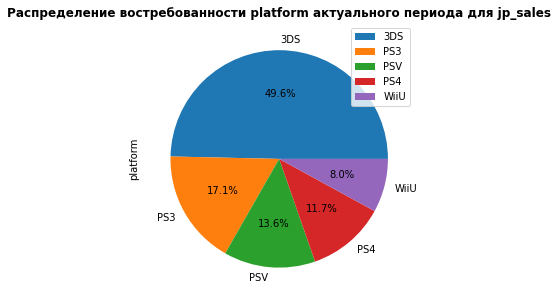

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


Популярные значения по platform региона jp_sales актуального периода: 3DS, PS3, PSV, PS4, WiiU



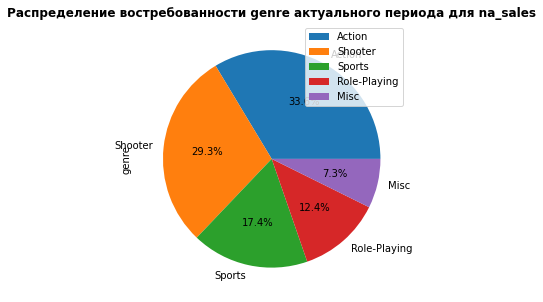

,genre,na_sales
0,Action,126.13
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


Популярные значения по genre региона na_sales актуального периода: Action, Shooter, Sports, Role-Playing, Misc



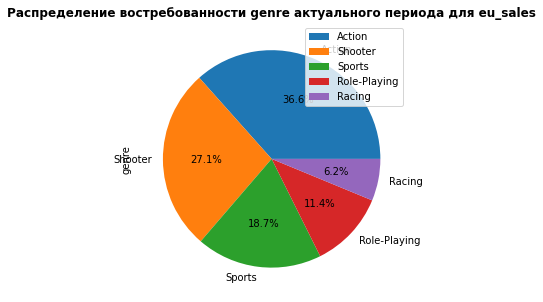

,genre,eu_sales
0,Action,118.61
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


Популярные значения по genre региона eu_sales актуального периода: Action, Shooter, Sports, Role-Playing, Racing



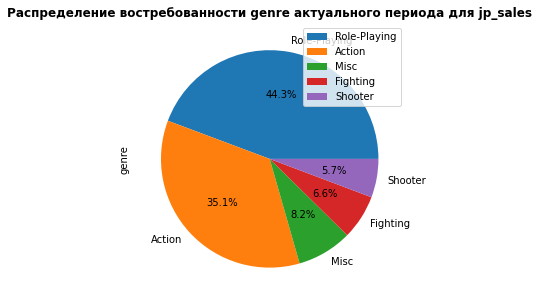

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.44
3,Fighting,7.65
4,Shooter,6.61


Популярные значения по genre региона jp_sales актуального периода: Role-Playing, Action, Misc, Fighting, Shooter



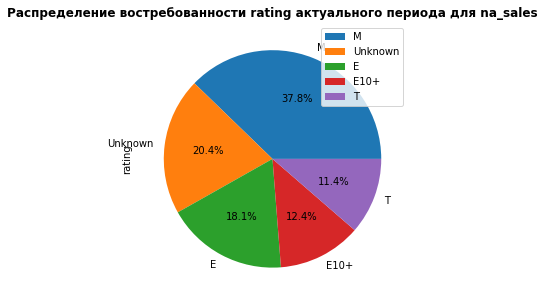

,rating,na_sales
0,M,165.29
1,Unknown,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


Популярные значения по rating региона na_sales актуального периода: M, Unknown, E, E10+, T



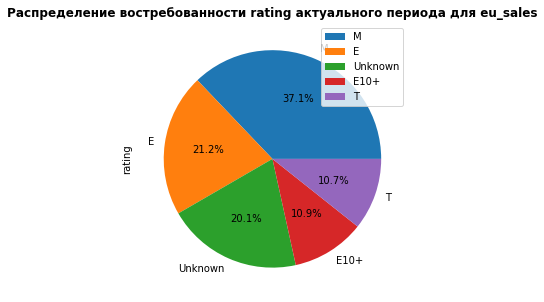

,rating,eu_sales
0,M,145.80
1,E,83.36
2,Unknown,78.91
3,E10+,42.69
4,T,41.95


Популярные значения по rating региона eu_sales актуального периода: M, E, Unknown, E10+, T



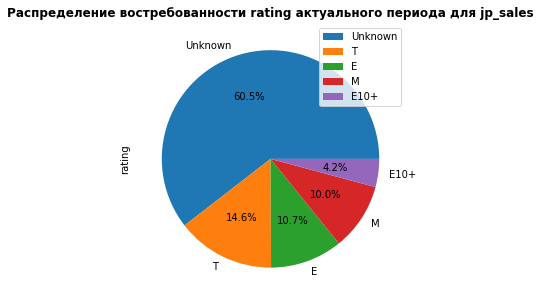

,rating,jp_sales
0,Unknown,85.29
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


Популярные значения по rating региона jp_sales актуального периода: Unknown, T, E, M, E10+



In [60]:
def my_func_for_pop2(index, reg_sales):
    esrb = data.query('year_of_release >= 2013').groupby(index)[reg_sales].sum().sort_values(ascending=False).head()
    #esrb.reset_index(inplace=True)
    
    esrb.plot(y=reg_sales, kind='pie', figsize=(8, 5), legend=True, grid=True, 
              autopct='%1.1f%%', label=index)

    plt.title('Распределение востребованности' + ' ' + index + ' ' + 'актуального периода для' + ' ' + reg_sales, 
              fontweight='bold')
    plt.show();
    
    esrb = data.query('year_of_release >= 2013').groupby(index)[reg_sales].sum().reset_index()
    
    esrb = esrb.sort_values(reg_sales, ascending=False).reset_index(drop=True).head()
    display(esrb)
    esrb = esrb[index].unique()
    print('Популярные значения по', index, 'региона', reg_sales,'актуального периода:',', '.join(esrb))
    print()

my_func_for_pop2('platform', 'na_sales')
my_func_for_pop2('platform', 'eu_sales')
my_func_for_pop2('platform', 'jp_sales')

my_func_for_pop2('genre', 'na_sales')
my_func_for_pop2('genre', 'eu_sales')
my_func_for_pop2('genre', 'jp_sales')

my_func_for_pop2('rating', 'na_sales')
my_func_for_pop2('rating', 'eu_sales')
my_func_for_pop2('rating', 'jp_sales')

#### Вывод по самым популярным платформам (топ-5). Описываем различия

По лидерству продаж актуального периода Северная Америка **`na_sales`** и Европа **`eu_sales`** схожи. У них лидерские места занимают новые платформы **PS4 и XOne**. Оба региона заинтересованы в **PS3** и **X360**. Также в Северной Америке и Европе  (**`na_sales`** **`eu_sales`**) вошел в топ **`3DS`**. 

Что не скажешь о Японии **`jp_sales`**. **`3DS`** `здесь топ 1!` Тут преобладает платформы японского происхождения и компании `Nintendo`,  помимо, конечно, `PSP` от тоже японской компании `Sony`. Это может быть связано с тем, что там сильно развита локальная сеть игр, и она не распространяется на другие регионы. Но все же общее у всех этих регионов есть - это заинтересованность и востребованность в **PS3**. Можно назвать любимчиком

#### Вывод по самым популярным жанрам (топ-5)

В регионах Северной Америки **`na_sales`** и Европы **`eu_sales`** **почти одинаковы**. Тут люди увлечены почти одним и тем же. По **топ 4** идет **стопроцентное сходство** (только продажи немного отличаются, в Северной Америке побольше). Жанр `Role_Playing` (или `RPG`) тоже популярны, но не так, как в Японии **`jp_sales`**. Шутер `Shooter` популярен в **Японии** менее, чем по другим регионам. А вот жанр `Fighting` только здесь популярна так, что входит в топ. 

* Замечаем тенденцию, что люди в этом регионе **`jp_sales`** отличаются, возможно, сказывается обособленность их и менталитет, также не стоит исключать значимость языка. Он тоже, наверняка, вносит свой вклад

#### Вывод по влиянию рейтинга ESRB на продажи в отдельном регионе

Как мы ранее зафиксировали, рейтинг **ESRB** распределяется по таким критериям:
* `E` - everyone (**для всех**);
* `M` - mature (**от 17 лет+**);
* `T` - teen (**от 13 лет+**);
* `E10+` - everyone 10+ (**от 10 лет+**);
* `K-A` - kids to adults (**устарелое обозначение рейтинга "E" до 1999**);
* `AO` - adults only (**только взрослые** (**от 18 лет+**) );
* `EC` - early childhood (**раннее детство до 3-х лет**);
* `RP` - rating pending (**рейтинг пока не определён**)
* `Unknown` -  наша "заглушка"

Видим, что регионы Северной Америки **`na_sales`** и Европы **`eu_sales`** вновь имеют много общего и по употребляемой оценке рейтинга **ESRB**. Тут преобладает контент для `от 17 лет` **M**, `для всех` **E**, `от 13` **T** и `от 10 лет` **E10**. И есть небольшие различия, такие как продажи в контенте для нашего неопределенного рейтинга **`Unknown`**. В Японии **`jp_sales`** тоже присутствует контент по тому же рейтингу, но вот только как было уже подмечено, рейтинг **ESRB** `предназначен для маркировки игр для США и Канады`, в Японии **`jp_sales`** пропуски в этом рейтинге **доминируют полностью. Доля таких игр сотсавляет потчи 61%**. Но и в самой Северной Америке **`na_sales`** игр с такими же пропусками не мало. Доля их почти **38%**, что почти схоже с долей значений рейтинга `Unknown` в Европе **`eu_sales`** - **37%**

* В общем и целом, можно сказать, что **`влияние рейтинга на продажи в этих трех регионах разная`**, и по процентным соотношениям очень разнится

## Проверка гипотез

* **№1: Средние пользовательские рейтинги** платформ **Xbox One и PC одинаковые**;
* **№2: Средние пользовательские рейтинги** жанров **Action** (англ. «действие», экшен-игры) и **Sports** (англ. «спортивные соревнования») **разные**.

Взглянем на пользовательские рейтинги двух платформ **Xbox One и PC** (создадим срезы для них), `удалим ненужные нам пропуски` и выявим стандартные отклонения **(std)**, дисперсии **(var)** и среднее **(mean)**:

In [61]:
xone = data.loc[(data['platform'] == 'XOne')&(data['year_of_release'] >= 2013), :] #  срез
xone = xone.dropna(subset=['user_score']).reset_index(drop=True) # сохраняем порядок
#display(xone)

xone_group = xone.groupby('platform')['user_score'].agg(['mean', 'median', 'std', 'var']) 
display(xone_group)

,mean,median,std,var
platform,,,,
XOne,6.521429,6.8,1.380941,1.906997


count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

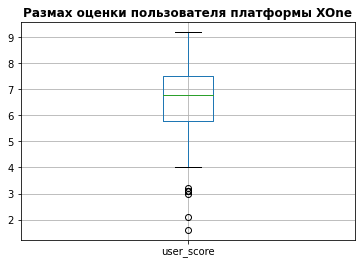

In [62]:
display(xone['user_score'].describe())
xone.boxplot('user_score')
plt.title('Размах оценки пользователя платформы XOne', fontweight='bold'); 

In [63]:
pc = data.loc[(data['platform'] == 'PC')&(data['year_of_release'] >= 2013), :] # то же самое и для PC
pc = pc.dropna(subset=['user_score']).reset_index(drop=True)
#display(pc)
pc_group = pc.groupby('platform')['user_score'].agg(['mean', 'median', 'std', 'var'])
display(pc_group)

,mean,median,std,var
platform,,,,
PC,6.28038,6.8,1.735044,3.010377


count    158.000000
mean       6.280380
std        1.735044
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

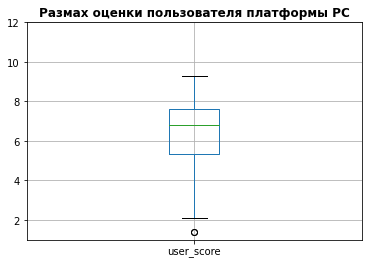

In [64]:
display(pc['user_score'].describe())
pc.boxplot('user_score')
plt.title('Размах оценки пользователя платформы PC', fontweight='bold')
plt.ylim(1, 12);

Видим по диаграмме размаха, что **межквартильный размах** у платформы **XOne** по оценки пользователя примерно `от 5.8 до 7.5`, а у платформы **PC** `от` примерно `5.3 до 7.6`. **Медианы** у них также `одинаковы` - **6.8 и 6.8** соответственно. 

Теперь перед проверкой гипотез нужно избавиться от выбросов, они могут влиять на гипотезы, а точнее на `t-распределения`. Например, методом **3-х сигм** можем их обнаружить - **(`mean - 3 * std, mean + 3 * std`)**

In [65]:
display(xone_group)
display(pc_group)
print(f'99% значений пользовательской оценки платформы "XOne" находятся от {6.52 - 3 * 1.38}')
print(f'99% значений пользовательской оценки платформы "PC" находятся от {6.28 - 3 * 1.73}')

,mean,median,std,var
platform,,,,
XOne,6.521429,6.8,1.380941,1.906997


,mean,median,std,var
platform,,,,
PC,6.28038,6.8,1.735044,3.010377


99% значений пользовательской оценки платформы "XOne" находятся от 2.38
99% значений пользовательской оценки платформы "PC" находятся от 1.0900000000000007


In [66]:
xone_emissions = round(len(xone[xone['user_score'] < 2.38]) / xone['user_score'].count() * 100, 2) 
pc_emissions = round(len(pc[pc['user_score'] < 1.09]) / pc['user_score'].count() * 100, 2)# смотрим проценты выбросов
print(xone_emissions)
print(pc_emissions)

1.1
0.0


#### Формулировка нулевой и альтернативной гипотезы №1

По правилу **3-х сигм** нашли значение для пользовательской оценки платформы **"XOne" и "PC"**. Теперь создадим срезы без выбросов (выборку) для двух платформ и составим нулевую гипотезу и альтернативную, которые гласят:
* **Н0**: Средние пользовательские рейтинги "Xbox One" и "PC" `одинаковые`
* **Н1**: Средние пользовательсике рейтинги "Xbox One" и "PC" `не одинаковые`

Формулировка была задана так, так как нулевая и альтернативная гипотеза всегда гласят "или-или", "равна-не равна"

In [67]:
sample_xone = xone.loc[: , 'user_score'].reset_index(drop=True)
sample_pc = pc.loc[: , 'user_score'].reset_index(drop=True)

In [68]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(      # мы используем для проверки гипотезы о равенстве среднего двух генеральных 
                            # совокупностей по взятым из них выборкам st.ttest_ind(array1, array2)
#Тут выборочные средние нормально распределены - применяем критерий Стьюдента 
# (это работает даже если генеральная не распределена нормально)
    sample_xone,
    sample_pc,
    equal_var=False)  # указываем дисперсии разные, так как видили ранее по значениям, что они существенно отличаются

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.16174359801784316
Не получилось отвергнуть нулевую гипотезу


#### Вывод по гипотезе №1

Результат наших действий показал, что **`не получилось отвергнуть нулевую гипотезу`** и тем самым и **гипотезу** под **№1**, которая гласила, что средние пользовательские рейтинги "Xbox One" и "PC" **одинаковые**. **Вероятность случайно получить** такое или большее различие равно около **`16%`**. Это большая вероятность, чтобы делать вывод о значимом различии между оценкой пользователя платформ **XOne** и **PC**

#### Формулировка нулевой и альтернативной гипотезы №2

* **Н0**: Средние пользовательские рейтинги жанров **Action** и **Sports** `равны`
* **Н1**: Средние пользовательские рейтинги жанров **Action** и **Sports** `не равны`

Проделываем по аналогии с первой гипотезой:

In [69]:
action = data.loc[(data['genre'] == 'Action')&(data['year_of_release'] >= 2013), :]
action = action.dropna(subset=['user_score']).reset_index(drop=True)
#display(action)

action_group = action.groupby('genre')['user_score'].agg(['mean', 'median', 'std', 'var']) 
display(action_group)

sports = data.loc[(data['genre'] == 'Sports')&(data['year_of_release'] >= 2013), :]
sports = sports.dropna(subset=['user_score']).reset_index(drop=True)
#display(sports)

sports_group = sports.groupby('genre')['user_score'].agg(['mean', 'median', 'std', 'var']) 
display(sports_group)

,mean,median,std,var
genre,,,,
Action,6.8375,7.1,1.329076,1.766442


,mean,median,std,var
genre,,,,
Sports,5.238125,5.5,1.783427,3.180613


count    392.000000
mean       6.837500
std        1.329076
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64


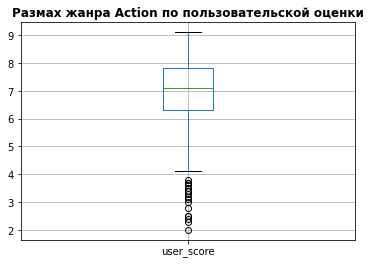

In [70]:
print(action['user_score'].describe())
action.boxplot('user_score')
plt.title('Размах жанра Action по пользовательской оценки', fontweight='bold');

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64


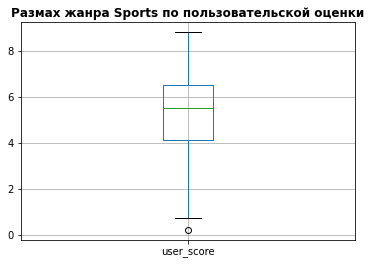

In [71]:
print(sports['user_score'].describe())
sports.boxplot('user_score')
plt.title('Размах жанра Sports по пользовательской оценки', fontweight='bold');

Так же, как и ранее перед проверкой гипотез нужно избавиться от выбросов, они могут влиять на гипотезы. Наблюдаем, что **межквартильный размах** у экшна **`Action`** равен примерно `от 6.3 до 7.8`. А у спорта **`Sports`** примерно `4.1 - 6.5`. Подмечаем, что и `медианы (median) у них разные -` **7.1 и 5.5 соответственно**, да и `средние (mean) почти тоже (6.8 и 5.2 соответственно)`.

Снова правило **3-х сигм** и обнаружение выбросов **(`mean - 3 * std, mean + 3 * std`)**

In [72]:
print(f'99% значений пользовательской оценки по жанру "Action" находятся от {6.83 - 3 * 1.32}')
print(f'99% значений пользовательской оценки по жанру "Sports" находятся от {5.23 - 3 * 1.78}')

99% значений пользовательской оценки по жанру "Action" находятся от 2.87
99% значений пользовательской оценки по жанру "Sports" находятся от -0.10999999999999943


In [73]:
action_emissions = round(len(action[action['user_score'] < 2.87]) / action['user_score'].count() * 100, 2) 
sports_emissions = round(len(sports[sports['user_score'] < 0]) / sports['user_score'].count() * 100, 2)
print(action_emissions)
print(sports_emissions)

1.53
0.0


In [74]:
sample_action = action.loc[: , 'user_score'].reset_index(drop=True)
sample_sports = sports.loc[: , 'user_score'].reset_index(drop=True)

In [75]:
alpha = .05 

results = st.ttest_ind(
    sample_action,
    sample_sports,
    equal_var=False)  # указываем дисперсии разные, так как видили ранее по значениям, что они отличаются
                      # (тут если указывать True значения особо не меняются)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


#### Вывод по гипотезе №2

Они все же **разные**. **Отвергли нулевую гипотезу** и тем самым и **гипотезу** под **№2**, которая гласила, что средние пользовательские рейтинги жанров **Action** и **Sports** `равны`

## Общий вывод

* Мы разобрали данные из открытых источников и проделали работу на прогнозом в игровой индустрии;
* Разобрали некоторые пропущенные значения в данных (интересным способом устранили их в колонке `year_of_release`) и преобразовали к нужному типу (там, где это было возможно);
* В колонке **user_score** разобрали и обработали аббревиатуру `'tbd'`;
* Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец  **`total_sales`**;
* **Посчитали** и показали на графике **вышедшие игры по годам**, продемонстрировали, как менялись продажи по игровым платформам, также выявили **актуальный период** (`2013 - 2016`), по которому сделали `прогноз на 2017 год`:
    * востребованные платформы: **`PS4`, `XOne`, `WiiU`, `3DS`, `PC`**; 
    * востребованные жанры: **`Action`, `Shooter`, `Sports` и `RPG`**
   
* Посмотрели, как влияют на продажи внутри одной популярной платформы **PS4** отзывы пользователей и критиков, и соотнесли выводы с продажами других платформ: 
    * выявили, что оценка критиков по многим платформам (`3DS, WiiU`) влияет на обратную оценку от пользователя;
    * также подметили, что оценка критиков слабо, но влияет на продажи топ-5 платформ актуального периода;
    * вот оценка пользователся не влияет почти, только у платформы `WiiU` присутствует явная связь  
* Составили портерт для каждого региона **`(NA, EU, JP)`**:
    * Портреты игроков **NA и EU схожи**: представители двух регионов любят **`PS4 и XOne`**. **`Именно в эти платформы и стоит вкладываться для данных регионов`**. Единственное, пользователи с региона **EU** любят чаще игры на стареньком **PS3**, а с **NA** на **X360**. Но эти платформы почти себя исчерпали. 
    * Они (NA, EU) любители жанров `Action, Shooter, Sports`. **Эти жанры стоит рассматривать для этих регионов**
    * Для **NA и EU** преобладает контент для `от 17 лет` **M**, `для всех` **E**, `от 13` **T** и `от 10 лет` **E10**. Здесь также много игр с пропущенным, неизветсным (`Unknown`) рейтингом. `Для` **NA** `38%`, **EU 37%**
    * Вот портрет для **JP** существенно отличается. Тут преобладает платформы японского происхождения и компании `Nintendo Sony`: (`3DS, PS3, PSV, PS4 и WiiU`). Платформа **3DS** тут является `топ 1`, хотя она уже относительно старенькая (2010 год), все же на 2017 прогноз `она` будет `востребована`. **PS3** хоть и занимает топ место по продажам, все-таки ее цикл подходит к концу
    * `Японский игрок` часто выбирает игры с жанрами **`Role-Playing, Action, Misc, Fighting, Shooter`**. **Имеено жанры `Role-Playing, Action` стоит рассмотреть для продвижения платформ этого региона JP**. Над контентом тут доминирует полностью рейтинг с пропусками (`Unknown`). Оно и понятно, так как рейтинг **ESRB** предназначен для США и Канады. 
    * Разница между этими регионами может служить разный менталитет и более обособленные локальные интересы
    
**Резюмируем портреты игроков разных регионов**:
* Игрок Северной Америки **NA** - от 17 лет (также с неизвестным рейтингом контента игры), играет на **PS4 и XOne**, преимущественно любит игры на реакции и соревновательный контент жанров `Action, Shooter, Sports`
* Игрок Европы **EU** - от 17 или для всего возраста (также много значений с неопределенным контентом игр), играет преимущественно на **PS4**, также преполчитает игры на реакции и соревновательный контент жанров `Action, Shooter, Sports`
* Игрок Японии **JP** - от 13 лет, но намного чаще с неопределенным рейтингом контента по возрастной категории, играет премущественно на переносных консолях, например **3DS**. Любитель посидеть за жанрами `Role-Playing, Action`


* Были выдвинуты гипотезы, которые мы разобрали:
   
   **№1: Средние пользовательские рейтинги** платформ **Xbox One и PC одинаковые** - `это оказалось правдой`. Нами были   выдвинуты нулевая и альтернативная гипотеза, вследствии которой мы пришли к данному выводу;;
   
   **№2: Средние пользовательские рейтинги** жанров **Action** (англ. «действие», экшен-игры) и **Sports** (англ. «спортивные соревнования») **разные** - `это оказалось также правдой`. Вследствие анализа не получилось нам отвергнуть эту гипотезу 